1) Load necessary libraries

In [1]:
import tensorflow as tf
import keras

import pandas as pd                       # importing pandas libarary, pyton data analysis library 
pd.set_option('display.max_rows', None)   # to retrieve output for all rows

import numpy as np                        # importing numpy or python array object library 
import seaborn as sn
import matplotlib.pyplot as plt           # importing matplotlib library, python data visualization library 
%matplotlib inline
import statistics as st 

from sklearn import preprocessing         # Import label encoder 

from keras.utils import plot_model              

from sklearn.model_selection import train_test_split          # importing data splitter 
from sklearn.metrics import accuracy_score                    # importing accuracy score to determine model accuracy 
from sklearn.metrics import confusion_matrix                  # importing confution matrix 
from sklearn.metrics import classification_report

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\e

2) Load data file

In [2]:
df = pd.read_excel("C:/Users/Asus/Desktop/Data/research/Defect_Occurrence.xlsx")

In [3]:
df.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3,1
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5,0
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8,1
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5,1
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9,1


3) Cat Boost Classifier

In [4]:
# remove response variable column from data frame

X = df.drop(['Defect_Occurrence'], axis=1)
X.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9


In [5]:
# Load response variable to seperate dataframe

y = df['Defect_Occurrence'].values

In [6]:
# Data spliting for training and testinf sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% for training and 30% for testing

# train set is used to train the model meaning; find weights and biases. 

# Random state ensures that the splits generate are reproducible. 
# Scikit-learn uses random permutations to generate the splits.
# If random_state is not specified every timethe code is run(execute) a new random value is generated and 
# the train and test datasets would have different values each time.
# random_state = 0 or 1 or 42 or any other integer. Then result would be the same during every execute.

print("Training Data Shape of X :",X_train.shape)
print("Training Data Shape of y :",y_train.shape)
print("Testing Data Shape of X :",X_test.shape)
print("Testing Data Shape of y :",y_test.shape)

Training Data Shape of X : (1008, 19)
Training Data Shape of y : (1008,)
Testing Data Shape of X : (432, 19)
Testing Data Shape of y : (432,)


In [7]:
# Extract predicted output

expected_output = y_test

In [8]:
from catboost import CatBoostClassifier               # import Cat Boost Classifier

CB = CatBoostClassifier()                             # create cat boost classifier
CB.fit(X_train, y_train)                              # train the model
y_prediction_11 = CB.predict(X_test)                  # predict response for test data set

Learning rate set to 0.010337
0:	learn: 0.6900381	total: 125ms	remaining: 2m 4s
1:	learn: 0.6866921	total: 127ms	remaining: 1m 3s
2:	learn: 0.6838726	total: 129ms	remaining: 42.9s
3:	learn: 0.6797028	total: 131ms	remaining: 32.7s
4:	learn: 0.6756205	total: 133ms	remaining: 26.5s
5:	learn: 0.6724532	total: 135ms	remaining: 22.4s
6:	learn: 0.6687123	total: 137ms	remaining: 19.5s
7:	learn: 0.6661859	total: 139ms	remaining: 17.3s
8:	learn: 0.6623117	total: 141ms	remaining: 15.6s
9:	learn: 0.6575172	total: 143ms	remaining: 14.2s
10:	learn: 0.6529850	total: 145ms	remaining: 13s
11:	learn: 0.6501264	total: 147ms	remaining: 12.1s
12:	learn: 0.6462040	total: 151ms	remaining: 11.4s
13:	learn: 0.6432536	total: 153ms	remaining: 10.8s
14:	learn: 0.6399095	total: 155ms	remaining: 10.2s
15:	learn: 0.6365659	total: 157ms	remaining: 9.65s
16:	learn: 0.6331551	total: 159ms	remaining: 9.19s
17:	learn: 0.6310501	total: 161ms	remaining: 8.78s
18:	learn: 0.6295647	total: 163ms	remaining: 8.4s
19:	learn: 0.6

176:	learn: 0.3778167	total: 476ms	remaining: 2.21s
177:	learn: 0.3772227	total: 478ms	remaining: 2.21s
178:	learn: 0.3766059	total: 480ms	remaining: 2.2s
179:	learn: 0.3760134	total: 481ms	remaining: 2.19s
180:	learn: 0.3746087	total: 483ms	remaining: 2.19s
181:	learn: 0.3741543	total: 485ms	remaining: 2.18s
182:	learn: 0.3738139	total: 487ms	remaining: 2.17s
183:	learn: 0.3728972	total: 489ms	remaining: 2.17s
184:	learn: 0.3719644	total: 491ms	remaining: 2.16s
185:	learn: 0.3712955	total: 493ms	remaining: 2.16s
186:	learn: 0.3701852	total: 495ms	remaining: 2.15s
187:	learn: 0.3695986	total: 497ms	remaining: 2.15s
188:	learn: 0.3688556	total: 499ms	remaining: 2.14s
189:	learn: 0.3675953	total: 502ms	remaining: 2.14s
190:	learn: 0.3666701	total: 504ms	remaining: 2.13s
191:	learn: 0.3660476	total: 506ms	remaining: 2.13s
192:	learn: 0.3656630	total: 508ms	remaining: 2.12s
193:	learn: 0.3646916	total: 509ms	remaining: 2.12s
194:	learn: 0.3641661	total: 512ms	remaining: 2.11s
195:	learn: 0

365:	learn: 0.2663605	total: 817ms	remaining: 1.41s
366:	learn: 0.2658584	total: 819ms	remaining: 1.41s
367:	learn: 0.2655537	total: 820ms	remaining: 1.41s
368:	learn: 0.2651578	total: 822ms	remaining: 1.41s
369:	learn: 0.2647317	total: 824ms	remaining: 1.4s
370:	learn: 0.2645268	total: 826ms	remaining: 1.4s
371:	learn: 0.2637194	total: 827ms	remaining: 1.4s
372:	learn: 0.2632884	total: 829ms	remaining: 1.39s
373:	learn: 0.2626664	total: 831ms	remaining: 1.39s
374:	learn: 0.2625870	total: 832ms	remaining: 1.39s
375:	learn: 0.2621101	total: 835ms	remaining: 1.39s
376:	learn: 0.2617465	total: 836ms	remaining: 1.38s
377:	learn: 0.2615833	total: 838ms	remaining: 1.38s
378:	learn: 0.2613744	total: 840ms	remaining: 1.38s
379:	learn: 0.2611257	total: 842ms	remaining: 1.37s
380:	learn: 0.2604914	total: 843ms	remaining: 1.37s
381:	learn: 0.2601025	total: 845ms	remaining: 1.37s
382:	learn: 0.2597164	total: 847ms	remaining: 1.36s
383:	learn: 0.2593732	total: 848ms	remaining: 1.36s
384:	learn: 0.2

556:	learn: 0.2092041	total: 1.17s	remaining: 932ms
557:	learn: 0.2091158	total: 1.17s	remaining: 929ms
558:	learn: 0.2086998	total: 1.18s	remaining: 927ms
559:	learn: 0.2083344	total: 1.18s	remaining: 925ms
560:	learn: 0.2079704	total: 1.18s	remaining: 922ms
561:	learn: 0.2077511	total: 1.18s	remaining: 920ms
562:	learn: 0.2071141	total: 1.18s	remaining: 919ms
563:	learn: 0.2069668	total: 1.19s	remaining: 917ms
564:	learn: 0.2067551	total: 1.19s	remaining: 915ms
565:	learn: 0.2062666	total: 1.19s	remaining: 913ms
566:	learn: 0.2059635	total: 1.19s	remaining: 911ms
567:	learn: 0.2057829	total: 1.19s	remaining: 908ms
568:	learn: 0.2053550	total: 1.2s	remaining: 906ms
569:	learn: 0.2050875	total: 1.2s	remaining: 904ms
570:	learn: 0.2046621	total: 1.2s	remaining: 901ms
571:	learn: 0.2045438	total: 1.2s	remaining: 899ms
572:	learn: 0.2044354	total: 1.2s	remaining: 897ms
573:	learn: 0.2043324	total: 1.21s	remaining: 895ms
574:	learn: 0.2040855	total: 1.21s	remaining: 893ms
575:	learn: 0.204

746:	learn: 0.1682205	total: 1.51s	remaining: 513ms
747:	learn: 0.1680882	total: 1.51s	remaining: 511ms
748:	learn: 0.1678675	total: 1.52s	remaining: 509ms
749:	learn: 0.1676538	total: 1.52s	remaining: 507ms
750:	learn: 0.1674859	total: 1.52s	remaining: 505ms
751:	learn: 0.1672585	total: 1.53s	remaining: 503ms
752:	learn: 0.1671421	total: 1.53s	remaining: 501ms
753:	learn: 0.1668202	total: 1.53s	remaining: 499ms
754:	learn: 0.1666990	total: 1.53s	remaining: 497ms
755:	learn: 0.1665329	total: 1.53s	remaining: 495ms
756:	learn: 0.1663561	total: 1.53s	remaining: 493ms
757:	learn: 0.1662005	total: 1.54s	remaining: 491ms
758:	learn: 0.1660206	total: 1.54s	remaining: 489ms
759:	learn: 0.1658580	total: 1.54s	remaining: 486ms
760:	learn: 0.1657191	total: 1.54s	remaining: 484ms
761:	learn: 0.1654433	total: 1.54s	remaining: 482ms
762:	learn: 0.1653253	total: 1.55s	remaining: 480ms
763:	learn: 0.1652380	total: 1.55s	remaining: 478ms
764:	learn: 0.1650160	total: 1.55s	remaining: 476ms
765:	learn: 

936:	learn: 0.1411747	total: 1.86s	remaining: 125ms
937:	learn: 0.1410592	total: 1.87s	remaining: 123ms
938:	learn: 0.1408895	total: 1.87s	remaining: 121ms
939:	learn: 0.1407416	total: 1.87s	remaining: 119ms
940:	learn: 0.1406723	total: 1.87s	remaining: 117ms
941:	learn: 0.1405959	total: 1.87s	remaining: 115ms
942:	learn: 0.1404140	total: 1.88s	remaining: 113ms
943:	learn: 0.1403480	total: 1.88s	remaining: 111ms
944:	learn: 0.1401989	total: 1.88s	remaining: 109ms
945:	learn: 0.1400684	total: 1.88s	remaining: 107ms
946:	learn: 0.1399861	total: 1.88s	remaining: 105ms
947:	learn: 0.1398559	total: 1.88s	remaining: 103ms
948:	learn: 0.1397331	total: 1.89s	remaining: 101ms
949:	learn: 0.1396406	total: 1.89s	remaining: 99.4ms
950:	learn: 0.1395291	total: 1.89s	remaining: 97.4ms
951:	learn: 0.1393554	total: 1.89s	remaining: 95.4ms
952:	learn: 0.1392920	total: 1.89s	remaining: 93.4ms
953:	learn: 0.1391240	total: 1.9s	remaining: 91.4ms
954:	learn: 0.1390483	total: 1.9s	remaining: 89.4ms
955:	lea

In [9]:
print('Training accuracy of the Cat Boost Classifier : ' , CB.score(X_train, y_train) )
print('Testing accuracy of the Cat Boost Classifier : ' , CB.score(X_test, y_test) )

Training accuracy of the Cat Boost Classifier :  0.9474206349206349
Testing accuracy of the Cat Boost Classifier :  0.9189814814814815


In [10]:
print('\nClassification Report')
print(classification_report(y_prediction_11, expected_output))

print('\nConfusion Matrix')
print(confusion_matrix(y_prediction_11, expected_output))


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       206
           1       0.96      0.88      0.92       226

    accuracy                           0.92       432
   macro avg       0.92      0.92      0.92       432
weighted avg       0.92      0.92      0.92       432


Confusion Matrix
[[198   8]
 [ 27 199]]


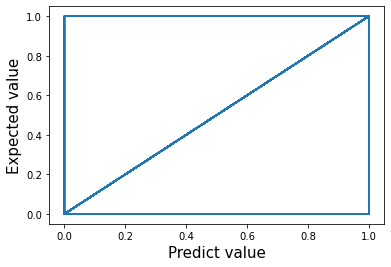

In [11]:
plt.plot(y_prediction_11, expected_output)
plt.xlabel('Predict value', fontsize=15)
plt.ylabel('Expected value', fontsize=15)
plt.show()

In [12]:
# loss function
from sklearn.metrics import log_loss

print('The binary cross entropy loss is : %f' % log_loss(y_prediction_11, expected_output))

The binary cross entropy loss is : 2.798295


In [13]:
 # Decision Tree 

df11 = pd.DataFrame({'Actual': y_test, 'Predicted':y_prediction_11})
df11

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,1
8,0,0
9,0,0


3) Cross validation

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn import model_selection

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [15]:
# K-fold Cross-Validation

kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = CatBoostClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.4f%%" % (results_kfold.mean())) 

Learning rate set to 0.011508
0:	learn: 0.6878658	total: 2.88ms	remaining: 2.88s
1:	learn: 0.6836694	total: 5.22ms	remaining: 2.61s
2:	learn: 0.6777031	total: 7.55ms	remaining: 2.51s
3:	learn: 0.6729052	total: 9.77ms	remaining: 2.43s
4:	learn: 0.6691762	total: 11.9ms	remaining: 2.36s
5:	learn: 0.6652121	total: 13.9ms	remaining: 2.31s
6:	learn: 0.6619058	total: 16.1ms	remaining: 2.28s
7:	learn: 0.6570633	total: 18.4ms	remaining: 2.29s
8:	learn: 0.6532915	total: 20.6ms	remaining: 2.27s
9:	learn: 0.6486740	total: 22.8ms	remaining: 2.26s
10:	learn: 0.6449642	total: 24.9ms	remaining: 2.24s
11:	learn: 0.6412369	total: 27.5ms	remaining: 2.26s
12:	learn: 0.6384949	total: 30.3ms	remaining: 2.3s
13:	learn: 0.6344551	total: 32.7ms	remaining: 2.3s
14:	learn: 0.6315380	total: 35ms	remaining: 2.3s
15:	learn: 0.6274645	total: 37.3ms	remaining: 2.29s
16:	learn: 0.6237094	total: 39.5ms	remaining: 2.29s
17:	learn: 0.6205565	total: 41.6ms	remaining: 2.27s
18:	learn: 0.6182869	total: 43.6ms	remaining: 2.2

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


32:	learn: 0.5720096	total: 74.4ms	remaining: 2.18s
33:	learn: 0.5692566	total: 76.7ms	remaining: 2.18s
34:	learn: 0.5643941	total: 78.7ms	remaining: 2.17s
35:	learn: 0.5613432	total: 81ms	remaining: 2.17s
36:	learn: 0.5587764	total: 83.1ms	remaining: 2.16s
37:	learn: 0.5560308	total: 85.4ms	remaining: 2.16s
38:	learn: 0.5531929	total: 88ms	remaining: 2.17s
39:	learn: 0.5499877	total: 91.5ms	remaining: 2.19s
40:	learn: 0.5454515	total: 94ms	remaining: 2.2s
41:	learn: 0.5435458	total: 96.5ms	remaining: 2.2s
42:	learn: 0.5411788	total: 98.9ms	remaining: 2.2s
43:	learn: 0.5391255	total: 102ms	remaining: 2.21s
44:	learn: 0.5362715	total: 106ms	remaining: 2.24s
45:	learn: 0.5332939	total: 109ms	remaining: 2.25s
46:	learn: 0.5312285	total: 111ms	remaining: 2.26s
47:	learn: 0.5300906	total: 114ms	remaining: 2.26s
48:	learn: 0.5279975	total: 116ms	remaining: 2.25s
49:	learn: 0.5245279	total: 118ms	remaining: 2.25s
50:	learn: 0.5225078	total: 120ms	remaining: 2.24s
51:	learn: 0.5212901	total: 1

218:	learn: 0.3229742	total: 516ms	remaining: 1.84s
219:	learn: 0.3222380	total: 519ms	remaining: 1.84s
220:	learn: 0.3217746	total: 521ms	remaining: 1.84s
221:	learn: 0.3209682	total: 523ms	remaining: 1.83s
222:	learn: 0.3203483	total: 526ms	remaining: 1.83s
223:	learn: 0.3194474	total: 529ms	remaining: 1.83s
224:	learn: 0.3192518	total: 532ms	remaining: 1.83s
225:	learn: 0.3186925	total: 535ms	remaining: 1.83s
226:	learn: 0.3173301	total: 538ms	remaining: 1.83s
227:	learn: 0.3168357	total: 540ms	remaining: 1.83s
228:	learn: 0.3162031	total: 542ms	remaining: 1.83s
229:	learn: 0.3155734	total: 545ms	remaining: 1.82s
230:	learn: 0.3151284	total: 547ms	remaining: 1.82s
231:	learn: 0.3147707	total: 549ms	remaining: 1.82s
232:	learn: 0.3137488	total: 551ms	remaining: 1.81s
233:	learn: 0.3130447	total: 553ms	remaining: 1.81s
234:	learn: 0.3120838	total: 556ms	remaining: 1.81s
235:	learn: 0.3114821	total: 558ms	remaining: 1.81s
236:	learn: 0.3106939	total: 560ms	remaining: 1.8s
237:	learn: 0

394:	learn: 0.2342689	total: 945ms	remaining: 1.45s
395:	learn: 0.2333841	total: 947ms	remaining: 1.45s
396:	learn: 0.2329112	total: 950ms	remaining: 1.44s
397:	learn: 0.2327987	total: 955ms	remaining: 1.44s
398:	learn: 0.2322595	total: 960ms	remaining: 1.45s
399:	learn: 0.2317983	total: 963ms	remaining: 1.44s
400:	learn: 0.2313882	total: 965ms	remaining: 1.44s
401:	learn: 0.2312052	total: 968ms	remaining: 1.44s
402:	learn: 0.2307236	total: 971ms	remaining: 1.44s
403:	learn: 0.2304541	total: 973ms	remaining: 1.44s
404:	learn: 0.2302784	total: 976ms	remaining: 1.43s
405:	learn: 0.2301361	total: 978ms	remaining: 1.43s
406:	learn: 0.2298549	total: 981ms	remaining: 1.43s
407:	learn: 0.2296231	total: 983ms	remaining: 1.43s
408:	learn: 0.2290971	total: 985ms	remaining: 1.42s
409:	learn: 0.2288761	total: 988ms	remaining: 1.42s
410:	learn: 0.2287752	total: 990ms	remaining: 1.42s
411:	learn: 0.2285734	total: 992ms	remaining: 1.42s
412:	learn: 0.2280469	total: 995ms	remaining: 1.41s
413:	learn: 

573:	learn: 0.1843636	total: 1.39s	remaining: 1.03s
574:	learn: 0.1842371	total: 1.39s	remaining: 1.03s
575:	learn: 0.1841146	total: 1.4s	remaining: 1.03s
576:	learn: 0.1837792	total: 1.4s	remaining: 1.03s
577:	learn: 0.1835744	total: 1.4s	remaining: 1.02s
578:	learn: 0.1832483	total: 1.41s	remaining: 1.02s
579:	learn: 0.1830528	total: 1.41s	remaining: 1.02s
580:	learn: 0.1828987	total: 1.41s	remaining: 1.02s
581:	learn: 0.1826332	total: 1.41s	remaining: 1.01s
582:	learn: 0.1823339	total: 1.42s	remaining: 1.01s
583:	learn: 0.1820800	total: 1.42s	remaining: 1.01s
584:	learn: 0.1819080	total: 1.42s	remaining: 1.01s
585:	learn: 0.1816866	total: 1.42s	remaining: 1s
586:	learn: 0.1815390	total: 1.43s	remaining: 1s
587:	learn: 0.1813792	total: 1.43s	remaining: 1s
588:	learn: 0.1810207	total: 1.43s	remaining: 998ms
589:	learn: 0.1808462	total: 1.43s	remaining: 996ms
590:	learn: 0.1802712	total: 1.44s	remaining: 994ms
591:	learn: 0.1801680	total: 1.44s	remaining: 992ms
592:	learn: 0.1799426	to

742:	learn: 0.1516583	total: 1.91s	remaining: 662ms
743:	learn: 0.1514358	total: 1.92s	remaining: 660ms
744:	learn: 0.1512571	total: 1.92s	remaining: 657ms
745:	learn: 0.1511759	total: 1.92s	remaining: 655ms
746:	learn: 0.1510337	total: 1.93s	remaining: 653ms
747:	learn: 0.1508766	total: 1.93s	remaining: 651ms
748:	learn: 0.1506564	total: 1.93s	remaining: 648ms
749:	learn: 0.1505564	total: 1.94s	remaining: 646ms
750:	learn: 0.1504772	total: 1.94s	remaining: 644ms
751:	learn: 0.1503198	total: 1.94s	remaining: 641ms
752:	learn: 0.1502682	total: 1.95s	remaining: 639ms
753:	learn: 0.1500845	total: 1.95s	remaining: 637ms
754:	learn: 0.1498970	total: 1.96s	remaining: 635ms
755:	learn: 0.1496991	total: 1.96s	remaining: 633ms
756:	learn: 0.1495644	total: 1.96s	remaining: 630ms
757:	learn: 0.1494658	total: 1.97s	remaining: 628ms
758:	learn: 0.1491330	total: 1.97s	remaining: 625ms
759:	learn: 0.1488993	total: 1.97s	remaining: 623ms
760:	learn: 0.1488288	total: 1.98s	remaining: 620ms
761:	learn: 

904:	learn: 0.1312294	total: 2.42s	remaining: 254ms
905:	learn: 0.1310793	total: 2.43s	remaining: 252ms
906:	learn: 0.1309723	total: 2.43s	remaining: 249ms
907:	learn: 0.1309247	total: 2.43s	remaining: 246ms
908:	learn: 0.1308658	total: 2.43s	remaining: 244ms
909:	learn: 0.1308322	total: 2.44s	remaining: 241ms
910:	learn: 0.1307659	total: 2.44s	remaining: 238ms
911:	learn: 0.1306543	total: 2.44s	remaining: 236ms
912:	learn: 0.1305898	total: 2.44s	remaining: 233ms
913:	learn: 0.1305133	total: 2.45s	remaining: 230ms
914:	learn: 0.1303942	total: 2.45s	remaining: 228ms
915:	learn: 0.1302984	total: 2.45s	remaining: 225ms
916:	learn: 0.1302676	total: 2.46s	remaining: 222ms
917:	learn: 0.1301452	total: 2.46s	remaining: 220ms
918:	learn: 0.1300873	total: 2.46s	remaining: 217ms
919:	learn: 0.1299541	total: 2.46s	remaining: 214ms
920:	learn: 0.1298342	total: 2.47s	remaining: 212ms
921:	learn: 0.1297802	total: 2.47s	remaining: 209ms
922:	learn: 0.1296805	total: 2.47s	remaining: 206ms
923:	learn: 

62:	learn: 0.4988588	total: 185ms	remaining: 2.75s
63:	learn: 0.4971455	total: 188ms	remaining: 2.75s
64:	learn: 0.4960921	total: 191ms	remaining: 2.74s
65:	learn: 0.4938906	total: 194ms	remaining: 2.74s
66:	learn: 0.4922607	total: 197ms	remaining: 2.74s
67:	learn: 0.4903062	total: 200ms	remaining: 2.74s
68:	learn: 0.4891993	total: 203ms	remaining: 2.74s
69:	learn: 0.4871357	total: 206ms	remaining: 2.74s
70:	learn: 0.4857733	total: 210ms	remaining: 2.74s
71:	learn: 0.4828011	total: 213ms	remaining: 2.74s
72:	learn: 0.4811460	total: 216ms	remaining: 2.74s
73:	learn: 0.4797245	total: 219ms	remaining: 2.74s
74:	learn: 0.4783109	total: 222ms	remaining: 2.74s
75:	learn: 0.4758307	total: 225ms	remaining: 2.73s
76:	learn: 0.4730371	total: 228ms	remaining: 2.73s
77:	learn: 0.4708973	total: 231ms	remaining: 2.73s
78:	learn: 0.4695654	total: 234ms	remaining: 2.73s
79:	learn: 0.4678541	total: 237ms	remaining: 2.72s
80:	learn: 0.4662290	total: 239ms	remaining: 2.71s
81:	learn: 0.4646291	total: 242

234:	learn: 0.3110043	total: 700ms	remaining: 2.28s
235:	learn: 0.3105015	total: 703ms	remaining: 2.27s
236:	learn: 0.3094186	total: 705ms	remaining: 2.27s
237:	learn: 0.3091930	total: 708ms	remaining: 2.27s
238:	learn: 0.3089622	total: 710ms	remaining: 2.26s
239:	learn: 0.3082572	total: 713ms	remaining: 2.26s
240:	learn: 0.3076935	total: 716ms	remaining: 2.25s
241:	learn: 0.3068410	total: 719ms	remaining: 2.25s
242:	learn: 0.3063416	total: 722ms	remaining: 2.25s
243:	learn: 0.3058677	total: 724ms	remaining: 2.24s
244:	learn: 0.3055993	total: 728ms	remaining: 2.24s
245:	learn: 0.3053481	total: 731ms	remaining: 2.24s
246:	learn: 0.3051497	total: 734ms	remaining: 2.24s
247:	learn: 0.3048673	total: 737ms	remaining: 2.23s
248:	learn: 0.3044332	total: 740ms	remaining: 2.23s
249:	learn: 0.3041708	total: 743ms	remaining: 2.23s
250:	learn: 0.3031682	total: 745ms	remaining: 2.22s
251:	learn: 0.3027520	total: 748ms	remaining: 2.22s
252:	learn: 0.3019505	total: 751ms	remaining: 2.22s
253:	learn: 

394:	learn: 0.2371611	total: 1.16s	remaining: 1.78s
395:	learn: 0.2366527	total: 1.16s	remaining: 1.77s
396:	learn: 0.2361352	total: 1.17s	remaining: 1.77s
397:	learn: 0.2355265	total: 1.17s	remaining: 1.77s
398:	learn: 0.2351160	total: 1.17s	remaining: 1.76s
399:	learn: 0.2345015	total: 1.17s	remaining: 1.76s
400:	learn: 0.2342876	total: 1.18s	remaining: 1.76s
401:	learn: 0.2340214	total: 1.18s	remaining: 1.75s
402:	learn: 0.2338494	total: 1.18s	remaining: 1.75s
403:	learn: 0.2336565	total: 1.18s	remaining: 1.75s
404:	learn: 0.2335582	total: 1.19s	remaining: 1.74s
405:	learn: 0.2333761	total: 1.19s	remaining: 1.74s
406:	learn: 0.2332034	total: 1.19s	remaining: 1.74s
407:	learn: 0.2326408	total: 1.19s	remaining: 1.73s
408:	learn: 0.2323756	total: 1.2s	remaining: 1.73s
409:	learn: 0.2322720	total: 1.2s	remaining: 1.73s
410:	learn: 0.2317002	total: 1.2s	remaining: 1.73s
411:	learn: 0.2314560	total: 1.21s	remaining: 1.72s
412:	learn: 0.2310444	total: 1.21s	remaining: 1.72s
413:	learn: 0.2

575:	learn: 0.1882864	total: 1.69s	remaining: 1.24s
576:	learn: 0.1881355	total: 1.69s	remaining: 1.24s
577:	learn: 0.1879370	total: 1.69s	remaining: 1.24s
578:	learn: 0.1876630	total: 1.7s	remaining: 1.23s
579:	learn: 0.1875064	total: 1.7s	remaining: 1.23s
580:	learn: 0.1873553	total: 1.7s	remaining: 1.23s
581:	learn: 0.1871455	total: 1.71s	remaining: 1.23s
582:	learn: 0.1870417	total: 1.71s	remaining: 1.22s
583:	learn: 0.1868248	total: 1.71s	remaining: 1.22s
584:	learn: 0.1866505	total: 1.71s	remaining: 1.22s
585:	learn: 0.1863117	total: 1.72s	remaining: 1.21s
586:	learn: 0.1861255	total: 1.72s	remaining: 1.21s
587:	learn: 0.1857322	total: 1.72s	remaining: 1.21s
588:	learn: 0.1854887	total: 1.72s	remaining: 1.2s
589:	learn: 0.1853459	total: 1.73s	remaining: 1.2s
590:	learn: 0.1851881	total: 1.73s	remaining: 1.2s
591:	learn: 0.1850225	total: 1.73s	remaining: 1.19s
592:	learn: 0.1848183	total: 1.73s	remaining: 1.19s
593:	learn: 0.1847116	total: 1.74s	remaining: 1.19s
594:	learn: 0.1846

762:	learn: 0.1533172	total: 2.22s	remaining: 690ms
763:	learn: 0.1532122	total: 2.23s	remaining: 687ms
764:	learn: 0.1530402	total: 2.23s	remaining: 684ms
765:	learn: 0.1529024	total: 2.23s	remaining: 681ms
766:	learn: 0.1526778	total: 2.23s	remaining: 678ms
767:	learn: 0.1524962	total: 2.23s	remaining: 675ms
768:	learn: 0.1524128	total: 2.24s	remaining: 672ms
769:	learn: 0.1521711	total: 2.24s	remaining: 669ms
770:	learn: 0.1519952	total: 2.24s	remaining: 666ms
771:	learn: 0.1518342	total: 2.25s	remaining: 664ms
772:	learn: 0.1517627	total: 2.25s	remaining: 661ms
773:	learn: 0.1515884	total: 2.25s	remaining: 658ms
774:	learn: 0.1515188	total: 2.25s	remaining: 655ms
775:	learn: 0.1513472	total: 2.26s	remaining: 652ms
776:	learn: 0.1511601	total: 2.26s	remaining: 649ms
777:	learn: 0.1510048	total: 2.26s	remaining: 646ms
778:	learn: 0.1508606	total: 2.27s	remaining: 643ms
779:	learn: 0.1506785	total: 2.27s	remaining: 641ms
780:	learn: 0.1505511	total: 2.27s	remaining: 638ms
781:	learn: 

949:	learn: 0.1325772	total: 2.74s	remaining: 144ms
950:	learn: 0.1324283	total: 2.75s	remaining: 141ms
951:	learn: 0.1323123	total: 2.75s	remaining: 139ms
952:	learn: 0.1322224	total: 2.75s	remaining: 136ms
953:	learn: 0.1321892	total: 2.75s	remaining: 133ms
954:	learn: 0.1320875	total: 2.76s	remaining: 130ms
955:	learn: 0.1320270	total: 2.76s	remaining: 127ms
956:	learn: 0.1319125	total: 2.76s	remaining: 124ms
957:	learn: 0.1317931	total: 2.77s	remaining: 121ms
958:	learn: 0.1316618	total: 2.77s	remaining: 118ms
959:	learn: 0.1315743	total: 2.77s	remaining: 115ms
960:	learn: 0.1314292	total: 2.77s	remaining: 113ms
961:	learn: 0.1313620	total: 2.77s	remaining: 110ms
962:	learn: 0.1312068	total: 2.78s	remaining: 107ms
963:	learn: 0.1310916	total: 2.78s	remaining: 104ms
964:	learn: 0.1310054	total: 2.78s	remaining: 101ms
965:	learn: 0.1309338	total: 2.79s	remaining: 98.1ms
966:	learn: 0.1308650	total: 2.79s	remaining: 95.2ms
967:	learn: 0.1307273	total: 2.79s	remaining: 92.3ms
968:	lear

157:	learn: 0.3727101	total: 520ms	remaining: 2.77s
158:	learn: 0.3720330	total: 524ms	remaining: 2.77s
159:	learn: 0.3708097	total: 526ms	remaining: 2.76s
160:	learn: 0.3696707	total: 529ms	remaining: 2.76s
161:	learn: 0.3690918	total: 532ms	remaining: 2.75s
162:	learn: 0.3676845	total: 534ms	remaining: 2.74s
163:	learn: 0.3670080	total: 537ms	remaining: 2.74s
164:	learn: 0.3658731	total: 540ms	remaining: 2.73s
165:	learn: 0.3649345	total: 543ms	remaining: 2.73s
166:	learn: 0.3642323	total: 546ms	remaining: 2.72s
167:	learn: 0.3627344	total: 549ms	remaining: 2.72s
168:	learn: 0.3620588	total: 552ms	remaining: 2.71s
169:	learn: 0.3615326	total: 554ms	remaining: 2.71s
170:	learn: 0.3607289	total: 557ms	remaining: 2.7s
171:	learn: 0.3592207	total: 560ms	remaining: 2.69s
172:	learn: 0.3578879	total: 562ms	remaining: 2.69s
173:	learn: 0.3567116	total: 565ms	remaining: 2.68s
174:	learn: 0.3560049	total: 568ms	remaining: 2.67s
175:	learn: 0.3552194	total: 570ms	remaining: 2.67s
176:	learn: 0

350:	learn: 0.2532519	total: 1.04s	remaining: 1.93s
351:	learn: 0.2528619	total: 1.05s	remaining: 1.93s
352:	learn: 0.2526202	total: 1.05s	remaining: 1.92s
353:	learn: 0.2523695	total: 1.05s	remaining: 1.92s
354:	learn: 0.2517051	total: 1.05s	remaining: 1.91s
355:	learn: 0.2513809	total: 1.05s	remaining: 1.91s
356:	learn: 0.2511521	total: 1.06s	remaining: 1.9s
357:	learn: 0.2506580	total: 1.06s	remaining: 1.9s
358:	learn: 0.2505314	total: 1.06s	remaining: 1.9s
359:	learn: 0.2502643	total: 1.06s	remaining: 1.89s
360:	learn: 0.2498293	total: 1.06s	remaining: 1.89s
361:	learn: 0.2498054	total: 1.07s	remaining: 1.88s
362:	learn: 0.2493372	total: 1.07s	remaining: 1.87s
363:	learn: 0.2490254	total: 1.07s	remaining: 1.87s
364:	learn: 0.2488370	total: 1.07s	remaining: 1.86s
365:	learn: 0.2486808	total: 1.07s	remaining: 1.86s
366:	learn: 0.2482949	total: 1.07s	remaining: 1.85s
367:	learn: 0.2478412	total: 1.08s	remaining: 1.85s
368:	learn: 0.2472579	total: 1.08s	remaining: 1.85s
369:	learn: 0.2

542:	learn: 0.1961077	total: 1.4s	remaining: 1.18s
543:	learn: 0.1958775	total: 1.4s	remaining: 1.18s
544:	learn: 0.1956632	total: 1.41s	remaining: 1.17s
545:	learn: 0.1955602	total: 1.41s	remaining: 1.17s
546:	learn: 0.1952883	total: 1.41s	remaining: 1.17s
547:	learn: 0.1950637	total: 1.41s	remaining: 1.16s
548:	learn: 0.1946456	total: 1.41s	remaining: 1.16s
549:	learn: 0.1943202	total: 1.42s	remaining: 1.16s
550:	learn: 0.1941982	total: 1.42s	remaining: 1.16s
551:	learn: 0.1941607	total: 1.42s	remaining: 1.15s
552:	learn: 0.1939601	total: 1.42s	remaining: 1.15s
553:	learn: 0.1936448	total: 1.42s	remaining: 1.15s
554:	learn: 0.1934735	total: 1.43s	remaining: 1.14s
555:	learn: 0.1932054	total: 1.43s	remaining: 1.14s
556:	learn: 0.1929162	total: 1.43s	remaining: 1.14s
557:	learn: 0.1927672	total: 1.43s	remaining: 1.13s
558:	learn: 0.1924133	total: 1.43s	remaining: 1.13s
559:	learn: 0.1921300	total: 1.44s	remaining: 1.13s
560:	learn: 0.1917218	total: 1.44s	remaining: 1.12s
561:	learn: 0.

711:	learn: 0.1632109	total: 1.74s	remaining: 706ms
712:	learn: 0.1629999	total: 1.75s	remaining: 703ms
713:	learn: 0.1628375	total: 1.75s	remaining: 701ms
714:	learn: 0.1626265	total: 1.75s	remaining: 698ms
715:	learn: 0.1625284	total: 1.75s	remaining: 696ms
716:	learn: 0.1623851	total: 1.76s	remaining: 693ms
717:	learn: 0.1622270	total: 1.76s	remaining: 691ms
718:	learn: 0.1620623	total: 1.76s	remaining: 688ms
719:	learn: 0.1619058	total: 1.76s	remaining: 686ms
720:	learn: 0.1616411	total: 1.76s	remaining: 683ms
721:	learn: 0.1614661	total: 1.77s	remaining: 681ms
722:	learn: 0.1613256	total: 1.77s	remaining: 678ms
723:	learn: 0.1612666	total: 1.77s	remaining: 676ms
724:	learn: 0.1610373	total: 1.77s	remaining: 673ms
725:	learn: 0.1608541	total: 1.78s	remaining: 671ms
726:	learn: 0.1605822	total: 1.78s	remaining: 668ms
727:	learn: 0.1603804	total: 1.78s	remaining: 666ms
728:	learn: 0.1602204	total: 1.78s	remaining: 663ms
729:	learn: 0.1599528	total: 1.78s	remaining: 661ms
730:	learn: 

922:	learn: 0.1364696	total: 2.26s	remaining: 188ms
923:	learn: 0.1364344	total: 2.26s	remaining: 186ms
924:	learn: 0.1363477	total: 2.26s	remaining: 183ms
925:	learn: 0.1362780	total: 2.26s	remaining: 181ms
926:	learn: 0.1362227	total: 2.27s	remaining: 179ms
927:	learn: 0.1361388	total: 2.27s	remaining: 176ms
928:	learn: 0.1360586	total: 2.28s	remaining: 174ms
929:	learn: 0.1359126	total: 2.28s	remaining: 172ms
930:	learn: 0.1357518	total: 2.28s	remaining: 169ms
931:	learn: 0.1356503	total: 2.28s	remaining: 167ms
932:	learn: 0.1355379	total: 2.29s	remaining: 164ms
933:	learn: 0.1354732	total: 2.29s	remaining: 162ms
934:	learn: 0.1354234	total: 2.29s	remaining: 160ms
935:	learn: 0.1353964	total: 2.3s	remaining: 157ms
936:	learn: 0.1352968	total: 2.3s	remaining: 155ms
937:	learn: 0.1351481	total: 2.3s	remaining: 152ms
938:	learn: 0.1350250	total: 2.3s	remaining: 150ms
939:	learn: 0.1349148	total: 2.31s	remaining: 147ms
940:	learn: 0.1348242	total: 2.31s	remaining: 145ms
941:	learn: 0.13

89:	learn: 0.4491091	total: 249ms	remaining: 2.51s
90:	learn: 0.4469940	total: 252ms	remaining: 2.52s
91:	learn: 0.4452699	total: 256ms	remaining: 2.52s
92:	learn: 0.4438737	total: 259ms	remaining: 2.52s
93:	learn: 0.4418197	total: 262ms	remaining: 2.52s
94:	learn: 0.4399479	total: 265ms	remaining: 2.52s
95:	learn: 0.4384854	total: 267ms	remaining: 2.51s
96:	learn: 0.4366632	total: 270ms	remaining: 2.51s
97:	learn: 0.4349712	total: 274ms	remaining: 2.52s
98:	learn: 0.4340320	total: 277ms	remaining: 2.52s
99:	learn: 0.4327513	total: 280ms	remaining: 2.52s
100:	learn: 0.4319118	total: 283ms	remaining: 2.52s
101:	learn: 0.4309952	total: 288ms	remaining: 2.53s
102:	learn: 0.4292361	total: 291ms	remaining: 2.53s
103:	learn: 0.4274282	total: 293ms	remaining: 2.53s
104:	learn: 0.4264233	total: 296ms	remaining: 2.52s
105:	learn: 0.4251066	total: 299ms	remaining: 2.52s
106:	learn: 0.4236858	total: 302ms	remaining: 2.52s
107:	learn: 0.4218516	total: 305ms	remaining: 2.52s
108:	learn: 0.4206300	t

289:	learn: 0.2730288	total: 762ms	remaining: 1.86s
290:	learn: 0.2728988	total: 764ms	remaining: 1.86s
291:	learn: 0.2723805	total: 768ms	remaining: 1.86s
292:	learn: 0.2718916	total: 771ms	remaining: 1.86s
293:	learn: 0.2715974	total: 773ms	remaining: 1.86s
294:	learn: 0.2713518	total: 776ms	remaining: 1.85s
295:	learn: 0.2709571	total: 778ms	remaining: 1.85s
296:	learn: 0.2705902	total: 780ms	remaining: 1.85s
297:	learn: 0.2701192	total: 783ms	remaining: 1.84s
298:	learn: 0.2698776	total: 786ms	remaining: 1.84s
299:	learn: 0.2697330	total: 788ms	remaining: 1.84s
300:	learn: 0.2688649	total: 790ms	remaining: 1.83s
301:	learn: 0.2686969	total: 793ms	remaining: 1.83s
302:	learn: 0.2683980	total: 796ms	remaining: 1.83s
303:	learn: 0.2680188	total: 799ms	remaining: 1.83s
304:	learn: 0.2673856	total: 801ms	remaining: 1.82s
305:	learn: 0.2670861	total: 803ms	remaining: 1.82s
306:	learn: 0.2663135	total: 806ms	remaining: 1.82s
307:	learn: 0.2659451	total: 808ms	remaining: 1.82s
308:	learn: 

510:	learn: 0.1985488	total: 1.32s	remaining: 1.26s
511:	learn: 0.1984276	total: 1.32s	remaining: 1.26s
512:	learn: 0.1979831	total: 1.32s	remaining: 1.25s
513:	learn: 0.1977748	total: 1.32s	remaining: 1.25s
514:	learn: 0.1975326	total: 1.33s	remaining: 1.25s
515:	learn: 0.1973065	total: 1.33s	remaining: 1.25s
516:	learn: 0.1971717	total: 1.33s	remaining: 1.24s
517:	learn: 0.1970265	total: 1.33s	remaining: 1.24s
518:	learn: 0.1966517	total: 1.34s	remaining: 1.24s
519:	learn: 0.1964927	total: 1.34s	remaining: 1.24s
520:	learn: 0.1962690	total: 1.34s	remaining: 1.24s
521:	learn: 0.1958612	total: 1.35s	remaining: 1.23s
522:	learn: 0.1954231	total: 1.35s	remaining: 1.23s
523:	learn: 0.1951111	total: 1.35s	remaining: 1.23s
524:	learn: 0.1948787	total: 1.35s	remaining: 1.23s
525:	learn: 0.1947247	total: 1.36s	remaining: 1.22s
526:	learn: 0.1945480	total: 1.36s	remaining: 1.22s
527:	learn: 0.1943759	total: 1.36s	remaining: 1.22s
528:	learn: 0.1941789	total: 1.36s	remaining: 1.21s
529:	learn: 

719:	learn: 0.1540771	total: 1.85s	remaining: 718ms
720:	learn: 0.1539866	total: 1.85s	remaining: 716ms
721:	learn: 0.1537097	total: 1.85s	remaining: 713ms
722:	learn: 0.1534514	total: 1.85s	remaining: 711ms
723:	learn: 0.1533574	total: 1.86s	remaining: 708ms
724:	learn: 0.1532554	total: 1.86s	remaining: 705ms
725:	learn: 0.1530618	total: 1.86s	remaining: 703ms
726:	learn: 0.1528438	total: 1.86s	remaining: 701ms
727:	learn: 0.1527392	total: 1.87s	remaining: 698ms
728:	learn: 0.1526465	total: 1.87s	remaining: 696ms
729:	learn: 0.1525630	total: 1.87s	remaining: 693ms
730:	learn: 0.1524201	total: 1.88s	remaining: 691ms
731:	learn: 0.1522330	total: 1.88s	remaining: 688ms
732:	learn: 0.1520848	total: 1.88s	remaining: 686ms
733:	learn: 0.1518457	total: 1.89s	remaining: 683ms
734:	learn: 0.1516400	total: 1.89s	remaining: 681ms
735:	learn: 0.1515027	total: 1.89s	remaining: 678ms
736:	learn: 0.1512141	total: 1.9s	remaining: 677ms
737:	learn: 0.1510040	total: 1.9s	remaining: 674ms
738:	learn: 0.

896:	learn: 0.1318134	total: 2.36s	remaining: 271ms
897:	learn: 0.1317086	total: 2.36s	remaining: 268ms
898:	learn: 0.1315863	total: 2.36s	remaining: 266ms
899:	learn: 0.1315040	total: 2.37s	remaining: 263ms
900:	learn: 0.1314228	total: 2.37s	remaining: 261ms
901:	learn: 0.1312454	total: 2.38s	remaining: 258ms
902:	learn: 0.1311169	total: 2.38s	remaining: 256ms
903:	learn: 0.1310848	total: 2.38s	remaining: 253ms
904:	learn: 0.1309949	total: 2.39s	remaining: 251ms
905:	learn: 0.1309118	total: 2.39s	remaining: 248ms
906:	learn: 0.1308773	total: 2.39s	remaining: 246ms
907:	learn: 0.1307065	total: 2.4s	remaining: 243ms
908:	learn: 0.1306253	total: 2.4s	remaining: 240ms
909:	learn: 0.1305469	total: 2.4s	remaining: 238ms
910:	learn: 0.1304361	total: 2.41s	remaining: 235ms
911:	learn: 0.1303797	total: 2.41s	remaining: 232ms
912:	learn: 0.1303250	total: 2.41s	remaining: 230ms
913:	learn: 0.1302625	total: 2.41s	remaining: 227ms
914:	learn: 0.1301653	total: 2.42s	remaining: 225ms
915:	learn: 0.1

69:	learn: 0.4841544	total: 185ms	remaining: 2.46s
70:	learn: 0.4827280	total: 188ms	remaining: 2.46s
71:	learn: 0.4810196	total: 191ms	remaining: 2.46s
72:	learn: 0.4789460	total: 194ms	remaining: 2.47s
73:	learn: 0.4778042	total: 197ms	remaining: 2.47s
74:	learn: 0.4757947	total: 200ms	remaining: 2.46s
75:	learn: 0.4735514	total: 202ms	remaining: 2.46s
76:	learn: 0.4702889	total: 205ms	remaining: 2.45s
77:	learn: 0.4681172	total: 207ms	remaining: 2.45s
78:	learn: 0.4666730	total: 210ms	remaining: 2.45s
79:	learn: 0.4656944	total: 213ms	remaining: 2.45s
80:	learn: 0.4640842	total: 215ms	remaining: 2.44s
81:	learn: 0.4630416	total: 218ms	remaining: 2.44s
82:	learn: 0.4603461	total: 220ms	remaining: 2.44s
83:	learn: 0.4583566	total: 223ms	remaining: 2.43s
84:	learn: 0.4567691	total: 225ms	remaining: 2.43s
85:	learn: 0.4556376	total: 228ms	remaining: 2.42s
86:	learn: 0.4543914	total: 231ms	remaining: 2.42s
87:	learn: 0.4536102	total: 233ms	remaining: 2.42s
88:	learn: 0.4520697	total: 235

267:	learn: 0.2859425	total: 701ms	remaining: 1.92s
268:	learn: 0.2855760	total: 705ms	remaining: 1.92s
269:	learn: 0.2848053	total: 708ms	remaining: 1.91s
270:	learn: 0.2840952	total: 711ms	remaining: 1.91s
271:	learn: 0.2832870	total: 714ms	remaining: 1.91s
272:	learn: 0.2827643	total: 716ms	remaining: 1.91s
273:	learn: 0.2819098	total: 719ms	remaining: 1.91s
274:	learn: 0.2813176	total: 722ms	remaining: 1.9s
275:	learn: 0.2809369	total: 725ms	remaining: 1.9s
276:	learn: 0.2806029	total: 727ms	remaining: 1.9s
277:	learn: 0.2801062	total: 730ms	remaining: 1.9s
278:	learn: 0.2796828	total: 733ms	remaining: 1.89s
279:	learn: 0.2791006	total: 735ms	remaining: 1.89s
280:	learn: 0.2787245	total: 738ms	remaining: 1.89s
281:	learn: 0.2783702	total: 741ms	remaining: 1.89s
282:	learn: 0.2780232	total: 743ms	remaining: 1.88s
283:	learn: 0.2769353	total: 745ms	remaining: 1.88s
284:	learn: 0.2763092	total: 748ms	remaining: 1.88s
285:	learn: 0.2761500	total: 750ms	remaining: 1.87s
286:	learn: 0.27

483:	learn: 0.2079490	total: 1.23s	remaining: 1.31s
484:	learn: 0.2076856	total: 1.23s	remaining: 1.31s
485:	learn: 0.2075471	total: 1.24s	remaining: 1.31s
486:	learn: 0.2071886	total: 1.24s	remaining: 1.3s
487:	learn: 0.2067557	total: 1.24s	remaining: 1.3s
488:	learn: 0.2064979	total: 1.24s	remaining: 1.3s
489:	learn: 0.2064385	total: 1.25s	remaining: 1.3s
490:	learn: 0.2061357	total: 1.25s	remaining: 1.29s
491:	learn: 0.2060920	total: 1.25s	remaining: 1.29s
492:	learn: 0.2058666	total: 1.25s	remaining: 1.29s
493:	learn: 0.2052609	total: 1.26s	remaining: 1.29s
494:	learn: 0.2051114	total: 1.26s	remaining: 1.28s
495:	learn: 0.2047348	total: 1.26s	remaining: 1.28s
496:	learn: 0.2044708	total: 1.26s	remaining: 1.28s
497:	learn: 0.2042027	total: 1.27s	remaining: 1.28s
498:	learn: 0.2041365	total: 1.27s	remaining: 1.27s
499:	learn: 0.2035478	total: 1.27s	remaining: 1.27s
500:	learn: 0.2034653	total: 1.27s	remaining: 1.27s
501:	learn: 0.2031465	total: 1.27s	remaining: 1.26s
502:	learn: 0.20

644:	learn: 0.1702470	total: 1.58s	remaining: 872ms
645:	learn: 0.1700349	total: 1.59s	remaining: 870ms
646:	learn: 0.1696957	total: 1.59s	remaining: 867ms
647:	learn: 0.1694593	total: 1.59s	remaining: 865ms
648:	learn: 0.1692719	total: 1.6s	remaining: 863ms
649:	learn: 0.1690608	total: 1.6s	remaining: 861ms
650:	learn: 0.1689017	total: 1.6s	remaining: 860ms
651:	learn: 0.1687670	total: 1.61s	remaining: 858ms
652:	learn: 0.1686658	total: 1.61s	remaining: 855ms
653:	learn: 0.1684097	total: 1.61s	remaining: 852ms
654:	learn: 0.1683269	total: 1.61s	remaining: 850ms
655:	learn: 0.1682131	total: 1.61s	remaining: 847ms
656:	learn: 0.1680674	total: 1.62s	remaining: 844ms
657:	learn: 0.1679318	total: 1.62s	remaining: 842ms
658:	learn: 0.1678014	total: 1.62s	remaining: 839ms
659:	learn: 0.1677231	total: 1.62s	remaining: 837ms
660:	learn: 0.1673181	total: 1.63s	remaining: 834ms
661:	learn: 0.1670925	total: 1.63s	remaining: 832ms
662:	learn: 0.1667490	total: 1.63s	remaining: 829ms
663:	learn: 0.1

862:	learn: 0.1373020	total: 2.1s	remaining: 334ms
863:	learn: 0.1371402	total: 2.1s	remaining: 331ms
864:	learn: 0.1369982	total: 2.11s	remaining: 329ms
865:	learn: 0.1367988	total: 2.11s	remaining: 326ms
866:	learn: 0.1367464	total: 2.11s	remaining: 324ms
867:	learn: 0.1366655	total: 2.11s	remaining: 322ms
868:	learn: 0.1365241	total: 2.12s	remaining: 319ms
869:	learn: 0.1364244	total: 2.12s	remaining: 317ms
870:	learn: 0.1363308	total: 2.12s	remaining: 314ms
871:	learn: 0.1362415	total: 2.13s	remaining: 312ms
872:	learn: 0.1361700	total: 2.13s	remaining: 310ms
873:	learn: 0.1361113	total: 2.13s	remaining: 307ms
874:	learn: 0.1360050	total: 2.13s	remaining: 305ms
875:	learn: 0.1359406	total: 2.13s	remaining: 302ms
876:	learn: 0.1357742	total: 2.14s	remaining: 300ms
877:	learn: 0.1356943	total: 2.14s	remaining: 297ms
878:	learn: 0.1356376	total: 2.14s	remaining: 295ms
879:	learn: 0.1355979	total: 2.15s	remaining: 293ms
880:	learn: 0.1355342	total: 2.15s	remaining: 290ms
881:	learn: 0.

30:	learn: 0.5820063	total: 83.7ms	remaining: 2.62s
31:	learn: 0.5787197	total: 87ms	remaining: 2.63s
32:	learn: 0.5759715	total: 89.7ms	remaining: 2.63s
33:	learn: 0.5729486	total: 92.2ms	remaining: 2.62s
34:	learn: 0.5688794	total: 97ms	remaining: 2.67s
35:	learn: 0.5668873	total: 99.6ms	remaining: 2.67s
36:	learn: 0.5639722	total: 102ms	remaining: 2.66s
37:	learn: 0.5613132	total: 105ms	remaining: 2.66s
38:	learn: 0.5588284	total: 108ms	remaining: 2.66s
39:	learn: 0.5564005	total: 110ms	remaining: 2.65s
40:	learn: 0.5528132	total: 113ms	remaining: 2.64s
41:	learn: 0.5502609	total: 118ms	remaining: 2.69s
42:	learn: 0.5474482	total: 120ms	remaining: 2.68s
43:	learn: 0.5450436	total: 125ms	remaining: 2.73s
44:	learn: 0.5429071	total: 129ms	remaining: 2.75s
45:	learn: 0.5405266	total: 133ms	remaining: 2.76s
46:	learn: 0.5383744	total: 139ms	remaining: 2.81s
47:	learn: 0.5370443	total: 141ms	remaining: 2.8s
48:	learn: 0.5328374	total: 143ms	remaining: 2.78s
49:	learn: 0.5297649	total: 14

240:	learn: 0.3048889	total: 613ms	remaining: 1.93s
241:	learn: 0.3041437	total: 615ms	remaining: 1.93s
242:	learn: 0.3038819	total: 617ms	remaining: 1.92s
243:	learn: 0.3035344	total: 619ms	remaining: 1.92s
244:	learn: 0.3032989	total: 622ms	remaining: 1.92s
245:	learn: 0.3030250	total: 624ms	remaining: 1.91s
246:	learn: 0.3023769	total: 627ms	remaining: 1.91s
247:	learn: 0.3017449	total: 629ms	remaining: 1.91s
248:	learn: 0.3014254	total: 631ms	remaining: 1.9s
249:	learn: 0.3009983	total: 634ms	remaining: 1.9s
250:	learn: 0.3007831	total: 636ms	remaining: 1.9s
251:	learn: 0.3001090	total: 638ms	remaining: 1.89s
252:	learn: 0.2993595	total: 641ms	remaining: 1.89s
253:	learn: 0.2990614	total: 643ms	remaining: 1.89s
254:	learn: 0.2986805	total: 645ms	remaining: 1.88s
255:	learn: 0.2982092	total: 647ms	remaining: 1.88s
256:	learn: 0.2973960	total: 649ms	remaining: 1.88s
257:	learn: 0.2967701	total: 651ms	remaining: 1.87s
258:	learn: 0.2963371	total: 653ms	remaining: 1.87s
259:	learn: 0.2

466:	learn: 0.2159826	total: 1.13s	remaining: 1.29s
467:	learn: 0.2157859	total: 1.13s	remaining: 1.29s
468:	learn: 0.2156224	total: 1.13s	remaining: 1.28s
469:	learn: 0.2152544	total: 1.14s	remaining: 1.28s
470:	learn: 0.2148949	total: 1.14s	remaining: 1.28s
471:	learn: 0.2142650	total: 1.14s	remaining: 1.27s
472:	learn: 0.2141233	total: 1.14s	remaining: 1.27s
473:	learn: 0.2140238	total: 1.14s	remaining: 1.27s
474:	learn: 0.2138273	total: 1.15s	remaining: 1.27s
475:	learn: 0.2136590	total: 1.15s	remaining: 1.27s
476:	learn: 0.2133421	total: 1.15s	remaining: 1.26s
477:	learn: 0.2130728	total: 1.16s	remaining: 1.26s
478:	learn: 0.2126779	total: 1.16s	remaining: 1.26s
479:	learn: 0.2124393	total: 1.16s	remaining: 1.26s
480:	learn: 0.2123231	total: 1.16s	remaining: 1.25s
481:	learn: 0.2122332	total: 1.16s	remaining: 1.25s
482:	learn: 0.2120757	total: 1.17s	remaining: 1.25s
483:	learn: 0.2116683	total: 1.17s	remaining: 1.25s
484:	learn: 0.2114852	total: 1.17s	remaining: 1.24s
485:	learn: 

688:	learn: 0.1620290	total: 1.65s	remaining: 745ms
689:	learn: 0.1617688	total: 1.65s	remaining: 743ms
690:	learn: 0.1616120	total: 1.66s	remaining: 741ms
691:	learn: 0.1613746	total: 1.66s	remaining: 738ms
692:	learn: 0.1611372	total: 1.66s	remaining: 736ms
693:	learn: 0.1609440	total: 1.66s	remaining: 733ms
694:	learn: 0.1608106	total: 1.67s	remaining: 731ms
695:	learn: 0.1606737	total: 1.67s	remaining: 728ms
696:	learn: 0.1604645	total: 1.67s	remaining: 726ms
697:	learn: 0.1602919	total: 1.67s	remaining: 724ms
698:	learn: 0.1599819	total: 1.68s	remaining: 721ms
699:	learn: 0.1599079	total: 1.68s	remaining: 719ms
700:	learn: 0.1598226	total: 1.68s	remaining: 717ms
701:	learn: 0.1596700	total: 1.68s	remaining: 714ms
702:	learn: 0.1595257	total: 1.69s	remaining: 712ms
703:	learn: 0.1593236	total: 1.69s	remaining: 710ms
704:	learn: 0.1591454	total: 1.69s	remaining: 708ms
705:	learn: 0.1590134	total: 1.69s	remaining: 706ms
706:	learn: 0.1586675	total: 1.7s	remaining: 704ms
707:	learn: 0

893:	learn: 0.1342346	total: 2.18s	remaining: 258ms
894:	learn: 0.1340775	total: 2.18s	remaining: 256ms
895:	learn: 0.1339470	total: 2.18s	remaining: 253ms
896:	learn: 0.1338824	total: 2.19s	remaining: 251ms
897:	learn: 0.1337132	total: 2.19s	remaining: 249ms
898:	learn: 0.1336081	total: 2.19s	remaining: 246ms
899:	learn: 0.1335368	total: 2.19s	remaining: 244ms
900:	learn: 0.1334034	total: 2.2s	remaining: 241ms
901:	learn: 0.1332934	total: 2.2s	remaining: 239ms
902:	learn: 0.1331895	total: 2.2s	remaining: 237ms
903:	learn: 0.1330650	total: 2.2s	remaining: 234ms
904:	learn: 0.1330121	total: 2.21s	remaining: 232ms
905:	learn: 0.1328445	total: 2.21s	remaining: 229ms
906:	learn: 0.1327456	total: 2.21s	remaining: 227ms
907:	learn: 0.1326461	total: 2.22s	remaining: 225ms
908:	learn: 0.1325528	total: 2.22s	remaining: 222ms
909:	learn: 0.1325097	total: 2.22s	remaining: 220ms
910:	learn: 0.1324136	total: 2.23s	remaining: 217ms
911:	learn: 0.1323298	total: 2.23s	remaining: 215ms
912:	learn: 0.13

66:	learn: 0.4938119	total: 171ms	remaining: 2.39s
67:	learn: 0.4922013	total: 174ms	remaining: 2.39s
68:	learn: 0.4905831	total: 177ms	remaining: 2.38s
69:	learn: 0.4885128	total: 179ms	remaining: 2.38s
70:	learn: 0.4872454	total: 181ms	remaining: 2.37s
71:	learn: 0.4859192	total: 184ms	remaining: 2.37s
72:	learn: 0.4839100	total: 187ms	remaining: 2.37s
73:	learn: 0.4827187	total: 190ms	remaining: 2.38s
74:	learn: 0.4815437	total: 194ms	remaining: 2.39s
75:	learn: 0.4793493	total: 197ms	remaining: 2.39s
76:	learn: 0.4767956	total: 199ms	remaining: 2.39s
77:	learn: 0.4748297	total: 202ms	remaining: 2.39s
78:	learn: 0.4728926	total: 204ms	remaining: 2.38s
79:	learn: 0.4711185	total: 207ms	remaining: 2.38s
80:	learn: 0.4692928	total: 209ms	remaining: 2.37s
81:	learn: 0.4680859	total: 212ms	remaining: 2.37s
82:	learn: 0.4670133	total: 214ms	remaining: 2.36s
83:	learn: 0.4656829	total: 217ms	remaining: 2.36s
84:	learn: 0.4631484	total: 219ms	remaining: 2.36s
85:	learn: 0.4621058	total: 222

252:	learn: 0.3008909	total: 699ms	remaining: 2.06s
253:	learn: 0.3005749	total: 702ms	remaining: 2.06s
254:	learn: 0.2995623	total: 705ms	remaining: 2.06s
255:	learn: 0.2993216	total: 707ms	remaining: 2.06s
256:	learn: 0.2985904	total: 710ms	remaining: 2.05s
257:	learn: 0.2981593	total: 714ms	remaining: 2.05s
258:	learn: 0.2975580	total: 717ms	remaining: 2.05s
259:	learn: 0.2972024	total: 720ms	remaining: 2.05s
260:	learn: 0.2969117	total: 723ms	remaining: 2.04s
261:	learn: 0.2963806	total: 726ms	remaining: 2.04s
262:	learn: 0.2960391	total: 729ms	remaining: 2.04s
263:	learn: 0.2958822	total: 731ms	remaining: 2.04s
264:	learn: 0.2954157	total: 734ms	remaining: 2.04s
265:	learn: 0.2946594	total: 737ms	remaining: 2.03s
266:	learn: 0.2944457	total: 740ms	remaining: 2.03s
267:	learn: 0.2939365	total: 743ms	remaining: 2.03s
268:	learn: 0.2934900	total: 745ms	remaining: 2.02s
269:	learn: 0.2931361	total: 748ms	remaining: 2.02s
270:	learn: 0.2927687	total: 751ms	remaining: 2.02s
271:	learn: 

447:	learn: 0.2207295	total: 1.22s	remaining: 1.5s
448:	learn: 0.2205182	total: 1.22s	remaining: 1.5s
449:	learn: 0.2202559	total: 1.22s	remaining: 1.49s
450:	learn: 0.2195757	total: 1.22s	remaining: 1.49s
451:	learn: 0.2190675	total: 1.23s	remaining: 1.49s
452:	learn: 0.2187637	total: 1.23s	remaining: 1.48s
453:	learn: 0.2185265	total: 1.23s	remaining: 1.48s
454:	learn: 0.2184228	total: 1.23s	remaining: 1.48s
455:	learn: 0.2179926	total: 1.24s	remaining: 1.48s
456:	learn: 0.2174654	total: 1.24s	remaining: 1.47s
457:	learn: 0.2171144	total: 1.24s	remaining: 1.47s
458:	learn: 0.2165313	total: 1.25s	remaining: 1.47s
459:	learn: 0.2164555	total: 1.25s	remaining: 1.47s
460:	learn: 0.2161623	total: 1.25s	remaining: 1.46s
461:	learn: 0.2160358	total: 1.25s	remaining: 1.46s
462:	learn: 0.2156990	total: 1.25s	remaining: 1.46s
463:	learn: 0.2155569	total: 1.26s	remaining: 1.45s
464:	learn: 0.2153886	total: 1.26s	remaining: 1.45s
465:	learn: 0.2149931	total: 1.27s	remaining: 1.45s
466:	learn: 0.

637:	learn: 0.1732810	total: 1.73s	remaining: 981ms
638:	learn: 0.1730827	total: 1.73s	remaining: 980ms
639:	learn: 0.1728524	total: 1.74s	remaining: 977ms
640:	learn: 0.1726978	total: 1.74s	remaining: 975ms
641:	learn: 0.1724705	total: 1.74s	remaining: 972ms
642:	learn: 0.1720721	total: 1.75s	remaining: 969ms
643:	learn: 0.1718332	total: 1.75s	remaining: 966ms
644:	learn: 0.1717123	total: 1.75s	remaining: 964ms
645:	learn: 0.1715640	total: 1.75s	remaining: 961ms
646:	learn: 0.1713861	total: 1.76s	remaining: 958ms
647:	learn: 0.1711263	total: 1.76s	remaining: 955ms
648:	learn: 0.1710268	total: 1.76s	remaining: 952ms
649:	learn: 0.1708022	total: 1.76s	remaining: 950ms
650:	learn: 0.1707301	total: 1.77s	remaining: 947ms
651:	learn: 0.1703168	total: 1.77s	remaining: 946ms
652:	learn: 0.1700726	total: 1.77s	remaining: 943ms
653:	learn: 0.1699823	total: 1.78s	remaining: 941ms
654:	learn: 0.1698602	total: 1.78s	remaining: 938ms
655:	learn: 0.1697885	total: 1.78s	remaining: 935ms
656:	learn: 

832:	learn: 0.1430066	total: 2.25s	remaining: 451ms
833:	learn: 0.1428783	total: 2.25s	remaining: 449ms
834:	learn: 0.1427441	total: 2.26s	remaining: 446ms
835:	learn: 0.1426805	total: 2.26s	remaining: 443ms
836:	learn: 0.1426254	total: 2.26s	remaining: 441ms
837:	learn: 0.1424946	total: 2.27s	remaining: 438ms
838:	learn: 0.1423871	total: 2.27s	remaining: 435ms
839:	learn: 0.1422429	total: 2.27s	remaining: 432ms
840:	learn: 0.1421739	total: 2.27s	remaining: 430ms
841:	learn: 0.1421175	total: 2.28s	remaining: 427ms
842:	learn: 0.1420070	total: 2.28s	remaining: 424ms
843:	learn: 0.1418549	total: 2.28s	remaining: 422ms
844:	learn: 0.1417743	total: 2.29s	remaining: 419ms
845:	learn: 0.1416013	total: 2.29s	remaining: 417ms
846:	learn: 0.1414763	total: 2.29s	remaining: 415ms
847:	learn: 0.1414237	total: 2.3s	remaining: 412ms
848:	learn: 0.1413153	total: 2.3s	remaining: 409ms
849:	learn: 0.1411763	total: 2.3s	remaining: 406ms
850:	learn: 0.1410981	total: 2.31s	remaining: 404ms
851:	learn: 0.1

Learning rate set to 0.011508
0:	learn: 0.6886260	total: 3.36ms	remaining: 3.36s
1:	learn: 0.6843689	total: 6.22ms	remaining: 3.1s
2:	learn: 0.6787861	total: 9.26ms	remaining: 3.08s
3:	learn: 0.6745696	total: 12.1ms	remaining: 3s
4:	learn: 0.6711631	total: 14.6ms	remaining: 2.91s
5:	learn: 0.6666165	total: 17.1ms	remaining: 2.84s
6:	learn: 0.6620777	total: 19.8ms	remaining: 2.81s
7:	learn: 0.6578480	total: 22.4ms	remaining: 2.77s
8:	learn: 0.6532636	total: 25.3ms	remaining: 2.78s
9:	learn: 0.6497367	total: 27.9ms	remaining: 2.76s
10:	learn: 0.6462191	total: 30.3ms	remaining: 2.72s
11:	learn: 0.6424441	total: 32.7ms	remaining: 2.69s
12:	learn: 0.6390675	total: 35.4ms	remaining: 2.69s
13:	learn: 0.6361259	total: 38ms	remaining: 2.68s
14:	learn: 0.6329328	total: 40.9ms	remaining: 2.69s
15:	learn: 0.6289123	total: 43.5ms	remaining: 2.68s
16:	learn: 0.6253383	total: 46ms	remaining: 2.66s
17:	learn: 0.6219184	total: 48.8ms	remaining: 2.66s
18:	learn: 0.6188551	total: 51.7ms	remaining: 2.67s


179:	learn: 0.3524257	total: 517ms	remaining: 2.35s
180:	learn: 0.3512113	total: 519ms	remaining: 2.35s
181:	learn: 0.3507305	total: 522ms	remaining: 2.35s
182:	learn: 0.3499243	total: 525ms	remaining: 2.34s
183:	learn: 0.3491190	total: 527ms	remaining: 2.34s
184:	learn: 0.3484750	total: 530ms	remaining: 2.33s
185:	learn: 0.3473877	total: 533ms	remaining: 2.33s
186:	learn: 0.3461008	total: 535ms	remaining: 2.33s
187:	learn: 0.3455725	total: 538ms	remaining: 2.32s
188:	learn: 0.3444079	total: 541ms	remaining: 2.32s
189:	learn: 0.3436331	total: 543ms	remaining: 2.32s
190:	learn: 0.3425294	total: 546ms	remaining: 2.31s
191:	learn: 0.3416983	total: 549ms	remaining: 2.31s
192:	learn: 0.3412170	total: 552ms	remaining: 2.31s
193:	learn: 0.3403787	total: 555ms	remaining: 2.3s
194:	learn: 0.3392140	total: 557ms	remaining: 2.3s
195:	learn: 0.3388904	total: 560ms	remaining: 2.3s
196:	learn: 0.3377144	total: 563ms	remaining: 2.29s
197:	learn: 0.3370246	total: 566ms	remaining: 2.29s
198:	learn: 0.3

379:	learn: 0.2445681	total: 1.03s	remaining: 1.68s
380:	learn: 0.2445263	total: 1.03s	remaining: 1.68s
381:	learn: 0.2442645	total: 1.04s	remaining: 1.68s
382:	learn: 0.2440720	total: 1.04s	remaining: 1.67s
383:	learn: 0.2433981	total: 1.04s	remaining: 1.67s
384:	learn: 0.2432508	total: 1.04s	remaining: 1.67s
385:	learn: 0.2426345	total: 1.05s	remaining: 1.66s
386:	learn: 0.2423034	total: 1.05s	remaining: 1.66s
387:	learn: 0.2421852	total: 1.05s	remaining: 1.66s
388:	learn: 0.2420009	total: 1.05s	remaining: 1.66s
389:	learn: 0.2416976	total: 1.06s	remaining: 1.65s
390:	learn: 0.2411050	total: 1.06s	remaining: 1.65s
391:	learn: 0.2405803	total: 1.06s	remaining: 1.65s
392:	learn: 0.2402766	total: 1.06s	remaining: 1.64s
393:	learn: 0.2399366	total: 1.07s	remaining: 1.64s
394:	learn: 0.2397197	total: 1.07s	remaining: 1.64s
395:	learn: 0.2394180	total: 1.07s	remaining: 1.64s
396:	learn: 0.2388994	total: 1.07s	remaining: 1.63s
397:	learn: 0.2382540	total: 1.08s	remaining: 1.63s
398:	learn: 

594:	learn: 0.1859452	total: 1.55s	remaining: 1.06s
595:	learn: 0.1857770	total: 1.56s	remaining: 1.06s
596:	learn: 0.1856612	total: 1.56s	remaining: 1.05s
597:	learn: 0.1853141	total: 1.56s	remaining: 1.05s
598:	learn: 0.1850105	total: 1.56s	remaining: 1.05s
599:	learn: 0.1847130	total: 1.57s	remaining: 1.04s
600:	learn: 0.1846997	total: 1.57s	remaining: 1.04s
601:	learn: 0.1843627	total: 1.57s	remaining: 1.04s
602:	learn: 0.1842292	total: 1.57s	remaining: 1.04s
603:	learn: 0.1839627	total: 1.58s	remaining: 1.03s
604:	learn: 0.1837113	total: 1.58s	remaining: 1.03s
605:	learn: 0.1834427	total: 1.58s	remaining: 1.03s
606:	learn: 0.1833714	total: 1.59s	remaining: 1.03s
607:	learn: 0.1832132	total: 1.59s	remaining: 1.02s
608:	learn: 0.1827482	total: 1.59s	remaining: 1.02s
609:	learn: 0.1825253	total: 1.59s	remaining: 1.02s
610:	learn: 0.1824476	total: 1.6s	remaining: 1.02s
611:	learn: 0.1822412	total: 1.6s	remaining: 1.01s
612:	learn: 0.1819026	total: 1.6s	remaining: 1.01s
613:	learn: 0.1

788:	learn: 0.1502664	total: 2.08s	remaining: 558ms
789:	learn: 0.1501510	total: 2.09s	remaining: 555ms
790:	learn: 0.1500490	total: 2.09s	remaining: 552ms
791:	learn: 0.1498651	total: 2.09s	remaining: 550ms
792:	learn: 0.1497413	total: 2.1s	remaining: 547ms
793:	learn: 0.1496834	total: 2.1s	remaining: 545ms
794:	learn: 0.1495210	total: 2.1s	remaining: 542ms
795:	learn: 0.1493410	total: 2.1s	remaining: 539ms
796:	learn: 0.1492214	total: 2.11s	remaining: 537ms
797:	learn: 0.1491162	total: 2.11s	remaining: 534ms
798:	learn: 0.1490193	total: 2.11s	remaining: 532ms
799:	learn: 0.1488389	total: 2.12s	remaining: 529ms
800:	learn: 0.1487713	total: 2.12s	remaining: 527ms
801:	learn: 0.1486229	total: 2.12s	remaining: 524ms
802:	learn: 0.1485341	total: 2.13s	remaining: 521ms
803:	learn: 0.1484038	total: 2.13s	remaining: 519ms
804:	learn: 0.1482238	total: 2.13s	remaining: 516ms
805:	learn: 0.1481457	total: 2.13s	remaining: 514ms
806:	learn: 0.1480992	total: 2.14s	remaining: 511ms
807:	learn: 0.14

967:	learn: 0.1321313	total: 2.6s	remaining: 85.8ms
968:	learn: 0.1320525	total: 2.6s	remaining: 83.2ms
969:	learn: 0.1319670	total: 2.6s	remaining: 80.5ms
970:	learn: 0.1318858	total: 2.6s	remaining: 77.8ms
971:	learn: 0.1317510	total: 2.61s	remaining: 75.1ms
972:	learn: 0.1316793	total: 2.61s	remaining: 72.4ms
973:	learn: 0.1316114	total: 2.61s	remaining: 69.7ms
974:	learn: 0.1315059	total: 2.62s	remaining: 67.1ms
975:	learn: 0.1314053	total: 2.62s	remaining: 64.4ms
976:	learn: 0.1313236	total: 2.62s	remaining: 61.7ms
977:	learn: 0.1312724	total: 2.62s	remaining: 59ms
978:	learn: 0.1312280	total: 2.63s	remaining: 56.3ms
979:	learn: 0.1311914	total: 2.63s	remaining: 53.6ms
980:	learn: 0.1311443	total: 2.63s	remaining: 51ms
981:	learn: 0.1310660	total: 2.63s	remaining: 48.3ms
982:	learn: 0.1309938	total: 2.64s	remaining: 45.6ms
983:	learn: 0.1309527	total: 2.64s	remaining: 42.9ms
984:	learn: 0.1308258	total: 2.64s	remaining: 40.2ms
985:	learn: 0.1307186	total: 2.64s	remaining: 37.5ms
9

147:	learn: 0.3753510	total: 377ms	remaining: 2.17s
148:	learn: 0.3746148	total: 380ms	remaining: 2.17s
149:	learn: 0.3736659	total: 383ms	remaining: 2.17s
150:	learn: 0.3728899	total: 385ms	remaining: 2.17s
151:	learn: 0.3716420	total: 388ms	remaining: 2.16s
152:	learn: 0.3706305	total: 390ms	remaining: 2.16s
153:	learn: 0.3696133	total: 393ms	remaining: 2.16s
154:	learn: 0.3681556	total: 396ms	remaining: 2.16s
155:	learn: 0.3672216	total: 399ms	remaining: 2.16s
156:	learn: 0.3664136	total: 403ms	remaining: 2.17s
157:	learn: 0.3654218	total: 406ms	remaining: 2.16s
158:	learn: 0.3641611	total: 409ms	remaining: 2.16s
159:	learn: 0.3635130	total: 411ms	remaining: 2.16s
160:	learn: 0.3622753	total: 414ms	remaining: 2.15s
161:	learn: 0.3613042	total: 416ms	remaining: 2.15s
162:	learn: 0.3604060	total: 419ms	remaining: 2.15s
163:	learn: 0.3594015	total: 422ms	remaining: 2.15s
164:	learn: 0.3582226	total: 424ms	remaining: 2.15s
165:	learn: 0.3572855	total: 427ms	remaining: 2.14s
166:	learn: 

350:	learn: 0.2501677	total: 907ms	remaining: 1.68s
351:	learn: 0.2495162	total: 910ms	remaining: 1.68s
352:	learn: 0.2491819	total: 913ms	remaining: 1.67s
353:	learn: 0.2489801	total: 917ms	remaining: 1.67s
354:	learn: 0.2484844	total: 920ms	remaining: 1.67s
355:	learn: 0.2480886	total: 923ms	remaining: 1.67s
356:	learn: 0.2477365	total: 926ms	remaining: 1.67s
357:	learn: 0.2471396	total: 929ms	remaining: 1.67s
358:	learn: 0.2467423	total: 932ms	remaining: 1.66s
359:	learn: 0.2461372	total: 935ms	remaining: 1.66s
360:	learn: 0.2457681	total: 938ms	remaining: 1.66s
361:	learn: 0.2457440	total: 940ms	remaining: 1.66s
362:	learn: 0.2457060	total: 943ms	remaining: 1.65s
363:	learn: 0.2448614	total: 946ms	remaining: 1.65s
364:	learn: 0.2447292	total: 950ms	remaining: 1.65s
365:	learn: 0.2445308	total: 953ms	remaining: 1.65s
366:	learn: 0.2443228	total: 956ms	remaining: 1.65s
367:	learn: 0.2439180	total: 959ms	remaining: 1.65s
368:	learn: 0.2435395	total: 962ms	remaining: 1.65s
369:	learn: 

509:	learn: 0.1986087	total: 1.25s	remaining: 1.2s
510:	learn: 0.1983553	total: 1.25s	remaining: 1.2s
511:	learn: 0.1981898	total: 1.25s	remaining: 1.19s
512:	learn: 0.1980498	total: 1.25s	remaining: 1.19s
513:	learn: 0.1977093	total: 1.26s	remaining: 1.19s
514:	learn: 0.1975524	total: 1.26s	remaining: 1.19s
515:	learn: 0.1973207	total: 1.26s	remaining: 1.18s
516:	learn: 0.1971376	total: 1.26s	remaining: 1.18s
517:	learn: 0.1969623	total: 1.27s	remaining: 1.18s
518:	learn: 0.1965113	total: 1.27s	remaining: 1.18s
519:	learn: 0.1963378	total: 1.27s	remaining: 1.17s
520:	learn: 0.1962125	total: 1.27s	remaining: 1.17s
521:	learn: 0.1961030	total: 1.27s	remaining: 1.17s
522:	learn: 0.1956732	total: 1.28s	remaining: 1.17s
523:	learn: 0.1956461	total: 1.28s	remaining: 1.16s
524:	learn: 0.1954372	total: 1.28s	remaining: 1.16s
525:	learn: 0.1951221	total: 1.28s	remaining: 1.16s
526:	learn: 0.1946344	total: 1.28s	remaining: 1.15s
527:	learn: 0.1945335	total: 1.29s	remaining: 1.15s
528:	learn: 0.

678:	learn: 0.1640823	total: 1.6s	remaining: 755ms
679:	learn: 0.1640011	total: 1.6s	remaining: 753ms
680:	learn: 0.1636977	total: 1.6s	remaining: 750ms
681:	learn: 0.1634399	total: 1.6s	remaining: 748ms
682:	learn: 0.1632919	total: 1.61s	remaining: 746ms
683:	learn: 0.1631716	total: 1.61s	remaining: 743ms
684:	learn: 0.1630975	total: 1.61s	remaining: 741ms
685:	learn: 0.1628851	total: 1.61s	remaining: 738ms
686:	learn: 0.1626231	total: 1.61s	remaining: 736ms
687:	learn: 0.1622939	total: 1.62s	remaining: 733ms
688:	learn: 0.1621385	total: 1.62s	remaining: 731ms
689:	learn: 0.1620046	total: 1.62s	remaining: 729ms
690:	learn: 0.1618821	total: 1.62s	remaining: 726ms
691:	learn: 0.1616391	total: 1.63s	remaining: 724ms
692:	learn: 0.1614017	total: 1.63s	remaining: 722ms
693:	learn: 0.1612642	total: 1.63s	remaining: 719ms
694:	learn: 0.1610994	total: 1.63s	remaining: 717ms
695:	learn: 0.1609211	total: 1.64s	remaining: 714ms
696:	learn: 0.1608099	total: 1.64s	remaining: 712ms
697:	learn: 0.16

837:	learn: 0.1396221	total: 1.94s	remaining: 375ms
838:	learn: 0.1395212	total: 1.94s	remaining: 373ms
839:	learn: 0.1393646	total: 1.94s	remaining: 370ms
840:	learn: 0.1392218	total: 1.95s	remaining: 368ms
841:	learn: 0.1390808	total: 1.95s	remaining: 366ms
842:	learn: 0.1390125	total: 1.95s	remaining: 363ms
843:	learn: 0.1389607	total: 1.95s	remaining: 361ms
844:	learn: 0.1388187	total: 1.95s	remaining: 359ms
845:	learn: 0.1387374	total: 1.96s	remaining: 356ms
846:	learn: 0.1386613	total: 1.96s	remaining: 354ms
847:	learn: 0.1385791	total: 1.96s	remaining: 352ms
848:	learn: 0.1384941	total: 1.96s	remaining: 349ms
849:	learn: 0.1384434	total: 1.97s	remaining: 347ms
850:	learn: 0.1383184	total: 1.97s	remaining: 345ms
851:	learn: 0.1381921	total: 1.97s	remaining: 342ms
852:	learn: 0.1381267	total: 1.97s	remaining: 340ms
853:	learn: 0.1380178	total: 1.97s	remaining: 338ms
854:	learn: 0.1379153	total: 1.98s	remaining: 335ms
855:	learn: 0.1378241	total: 1.98s	remaining: 333ms
856:	learn: 

22:	learn: 0.6032684	total: 65ms	remaining: 2.76s
23:	learn: 0.6008767	total: 67.8ms	remaining: 2.76s
24:	learn: 0.5993087	total: 70.3ms	remaining: 2.74s
25:	learn: 0.5956571	total: 72.8ms	remaining: 2.73s
26:	learn: 0.5927012	total: 75.1ms	remaining: 2.71s
27:	learn: 0.5889987	total: 77.5ms	remaining: 2.69s
28:	learn: 0.5870634	total: 80ms	remaining: 2.68s
29:	learn: 0.5839135	total: 83.3ms	remaining: 2.69s
30:	learn: 0.5823180	total: 86.1ms	remaining: 2.69s
31:	learn: 0.5789062	total: 88.5ms	remaining: 2.68s
32:	learn: 0.5760923	total: 91.5ms	remaining: 2.68s
33:	learn: 0.5730060	total: 94.1ms	remaining: 2.67s
34:	learn: 0.5683278	total: 97ms	remaining: 2.67s
35:	learn: 0.5660982	total: 99.6ms	remaining: 2.67s
36:	learn: 0.5622579	total: 102ms	remaining: 2.66s
37:	learn: 0.5591718	total: 106ms	remaining: 2.67s
38:	learn: 0.5569881	total: 108ms	remaining: 2.67s
39:	learn: 0.5541240	total: 111ms	remaining: 2.67s
40:	learn: 0.5519110	total: 114ms	remaining: 2.67s
41:	learn: 0.5479785	to

226:	learn: 0.3156672	total: 582ms	remaining: 1.98s
227:	learn: 0.3149937	total: 585ms	remaining: 1.98s
228:	learn: 0.3144730	total: 587ms	remaining: 1.98s
229:	learn: 0.3137585	total: 590ms	remaining: 1.97s
230:	learn: 0.3129896	total: 592ms	remaining: 1.97s
231:	learn: 0.3125730	total: 595ms	remaining: 1.97s
232:	learn: 0.3123335	total: 597ms	remaining: 1.97s
233:	learn: 0.3108533	total: 600ms	remaining: 1.96s
234:	learn: 0.3097711	total: 602ms	remaining: 1.96s
235:	learn: 0.3091625	total: 605ms	remaining: 1.96s
236:	learn: 0.3090118	total: 608ms	remaining: 1.96s
237:	learn: 0.3084579	total: 610ms	remaining: 1.95s
238:	learn: 0.3079927	total: 613ms	remaining: 1.95s
239:	learn: 0.3072640	total: 616ms	remaining: 1.95s
240:	learn: 0.3067910	total: 618ms	remaining: 1.95s
241:	learn: 0.3054392	total: 621ms	remaining: 1.94s
242:	learn: 0.3050441	total: 623ms	remaining: 1.94s
243:	learn: 0.3047098	total: 626ms	remaining: 1.94s
244:	learn: 0.3043789	total: 628ms	remaining: 1.94s
245:	learn: 

438:	learn: 0.2212575	total: 1.1s	remaining: 1.4s
439:	learn: 0.2210413	total: 1.1s	remaining: 1.4s
440:	learn: 0.2206741	total: 1.1s	remaining: 1.4s
441:	learn: 0.2203799	total: 1.1s	remaining: 1.39s
442:	learn: 0.2199197	total: 1.11s	remaining: 1.39s
443:	learn: 0.2196544	total: 1.11s	remaining: 1.39s
444:	learn: 0.2195414	total: 1.11s	remaining: 1.39s
445:	learn: 0.2190986	total: 1.11s	remaining: 1.38s
446:	learn: 0.2187880	total: 1.12s	remaining: 1.38s
447:	learn: 0.2186766	total: 1.12s	remaining: 1.38s
448:	learn: 0.2178854	total: 1.12s	remaining: 1.38s
449:	learn: 0.2176629	total: 1.12s	remaining: 1.37s
450:	learn: 0.2173622	total: 1.13s	remaining: 1.37s
451:	learn: 0.2171309	total: 1.13s	remaining: 1.37s
452:	learn: 0.2167097	total: 1.13s	remaining: 1.36s
453:	learn: 0.2165313	total: 1.13s	remaining: 1.36s
454:	learn: 0.2165144	total: 1.13s	remaining: 1.36s
455:	learn: 0.2162021	total: 1.14s	remaining: 1.36s
456:	learn: 0.2159301	total: 1.14s	remaining: 1.35s
457:	learn: 0.21563

660:	learn: 0.1682318	total: 1.62s	remaining: 831ms
661:	learn: 0.1681357	total: 1.62s	remaining: 828ms
662:	learn: 0.1677158	total: 1.63s	remaining: 826ms
663:	learn: 0.1676177	total: 1.63s	remaining: 824ms
664:	learn: 0.1675471	total: 1.63s	remaining: 821ms
665:	learn: 0.1673227	total: 1.63s	remaining: 819ms
666:	learn: 0.1672002	total: 1.64s	remaining: 816ms
667:	learn: 0.1671211	total: 1.64s	remaining: 815ms
668:	learn: 0.1668445	total: 1.64s	remaining: 814ms
669:	learn: 0.1667274	total: 1.65s	remaining: 812ms
670:	learn: 0.1666104	total: 1.65s	remaining: 810ms
671:	learn: 0.1663494	total: 1.65s	remaining: 808ms
672:	learn: 0.1662117	total: 1.66s	remaining: 805ms
673:	learn: 0.1660616	total: 1.66s	remaining: 803ms
674:	learn: 0.1660135	total: 1.66s	remaining: 800ms
675:	learn: 0.1659047	total: 1.66s	remaining: 798ms
676:	learn: 0.1657525	total: 1.67s	remaining: 795ms
677:	learn: 0.1655141	total: 1.67s	remaining: 793ms
678:	learn: 0.1653662	total: 1.67s	remaining: 790ms
679:	learn: 

864:	learn: 0.1381918	total: 2.15s	remaining: 336ms
865:	learn: 0.1381481	total: 2.16s	remaining: 334ms
866:	learn: 0.1380185	total: 2.16s	remaining: 332ms
867:	learn: 0.1379005	total: 2.16s	remaining: 329ms
868:	learn: 0.1378468	total: 2.17s	remaining: 327ms
869:	learn: 0.1376761	total: 2.17s	remaining: 324ms
870:	learn: 0.1375397	total: 2.17s	remaining: 322ms
871:	learn: 0.1373840	total: 2.17s	remaining: 319ms
872:	learn: 0.1373229	total: 2.18s	remaining: 317ms
873:	learn: 0.1372484	total: 2.18s	remaining: 314ms
874:	learn: 0.1371735	total: 2.18s	remaining: 312ms
875:	learn: 0.1370919	total: 2.19s	remaining: 310ms
876:	learn: 0.1369783	total: 2.19s	remaining: 307ms
877:	learn: 0.1368850	total: 2.19s	remaining: 305ms
878:	learn: 0.1367327	total: 2.19s	remaining: 302ms
879:	learn: 0.1365688	total: 2.2s	remaining: 300ms
880:	learn: 0.1364846	total: 2.2s	remaining: 297ms
881:	learn: 0.1364215	total: 2.2s	remaining: 295ms
882:	learn: 0.1363259	total: 2.21s	remaining: 292ms
883:	learn: 0.1

In [16]:
# Stratified K-fold Cross-Validation

skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = CatBoostClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.4f%%" % (results_skfold.mean()))

Learning rate set to 0.010124
0:	learn: 0.6900577	total: 2.66ms	remaining: 2.65s
1:	learn: 0.6859517	total: 5.07ms	remaining: 2.53s
2:	learn: 0.6809114	total: 7.38ms	remaining: 2.45s
3:	learn: 0.6764836	total: 9.69ms	remaining: 2.41s
4:	learn: 0.6734490	total: 12.5ms	remaining: 2.49s
5:	learn: 0.6698109	total: 14.8ms	remaining: 2.45s
6:	learn: 0.6664693	total: 17.5ms	remaining: 2.48s
7:	learn: 0.6633901	total: 20.9ms	remaining: 2.59s
8:	learn: 0.6586904	total: 23.9ms	remaining: 2.63s
9:	learn: 0.6551956	total: 26.5ms	remaining: 2.62s
10:	learn: 0.6528548	total: 28.9ms	remaining: 2.6s
11:	learn: 0.6495536	total: 31.3ms	remaining: 2.57s
12:	learn: 0.6461391	total: 34.4ms	remaining: 2.61s
13:	learn: 0.6431792	total: 37.6ms	remaining: 2.65s
14:	learn: 0.6407131	total: 40.5ms	remaining: 2.66s
15:	learn: 0.6372781	total: 43.2ms	remaining: 2.65s
16:	learn: 0.6349369	total: 47.5ms	remaining: 2.74s
17:	learn: 0.6334358	total: 49.8ms	remaining: 2.72s
18:	learn: 0.6311080	total: 52.6ms	remaining:

203:	learn: 0.3709442	total: 508ms	remaining: 1.98s
204:	learn: 0.3706402	total: 510ms	remaining: 1.98s
205:	learn: 0.3697091	total: 512ms	remaining: 1.97s
206:	learn: 0.3693003	total: 513ms	remaining: 1.97s
207:	learn: 0.3688643	total: 515ms	remaining: 1.96s
208:	learn: 0.3678410	total: 517ms	remaining: 1.96s
209:	learn: 0.3673740	total: 519ms	remaining: 1.95s
210:	learn: 0.3667156	total: 521ms	remaining: 1.95s
211:	learn: 0.3658680	total: 522ms	remaining: 1.94s
212:	learn: 0.3652790	total: 524ms	remaining: 1.94s
213:	learn: 0.3646408	total: 526ms	remaining: 1.93s
214:	learn: 0.3642151	total: 528ms	remaining: 1.93s
215:	learn: 0.3633370	total: 529ms	remaining: 1.92s
216:	learn: 0.3629382	total: 531ms	remaining: 1.92s
217:	learn: 0.3623662	total: 533ms	remaining: 1.91s
218:	learn: 0.3616331	total: 535ms	remaining: 1.91s
219:	learn: 0.3610555	total: 536ms	remaining: 1.9s
220:	learn: 0.3602890	total: 538ms	remaining: 1.9s
221:	learn: 0.3595828	total: 540ms	remaining: 1.89s
222:	learn: 0.

405:	learn: 0.2669936	total: 847ms	remaining: 1.24s
406:	learn: 0.2666192	total: 849ms	remaining: 1.24s
407:	learn: 0.2662355	total: 851ms	remaining: 1.23s
408:	learn: 0.2657747	total: 852ms	remaining: 1.23s
409:	learn: 0.2654581	total: 854ms	remaining: 1.23s
410:	learn: 0.2647894	total: 856ms	remaining: 1.23s
411:	learn: 0.2647207	total: 857ms	remaining: 1.22s
412:	learn: 0.2647005	total: 859ms	remaining: 1.22s
413:	learn: 0.2645439	total: 862ms	remaining: 1.22s
414:	learn: 0.2640083	total: 864ms	remaining: 1.22s
415:	learn: 0.2633968	total: 866ms	remaining: 1.22s
416:	learn: 0.2629404	total: 868ms	remaining: 1.21s
417:	learn: 0.2627038	total: 869ms	remaining: 1.21s
418:	learn: 0.2624927	total: 871ms	remaining: 1.21s
419:	learn: 0.2617055	total: 873ms	remaining: 1.21s
420:	learn: 0.2611987	total: 875ms	remaining: 1.2s
421:	learn: 0.2610272	total: 877ms	remaining: 1.2s
422:	learn: 0.2606912	total: 879ms	remaining: 1.2s
423:	learn: 0.2603576	total: 881ms	remaining: 1.2s
424:	learn: 0.25

593:	learn: 0.2138242	total: 1.2s	remaining: 817ms
594:	learn: 0.2135615	total: 1.2s	remaining: 815ms
595:	learn: 0.2133780	total: 1.2s	remaining: 813ms
596:	learn: 0.2129243	total: 1.2s	remaining: 811ms
597:	learn: 0.2124931	total: 1.2s	remaining: 809ms
598:	learn: 0.2123285	total: 1.21s	remaining: 807ms
599:	learn: 0.2121256	total: 1.21s	remaining: 805ms
600:	learn: 0.2121087	total: 1.21s	remaining: 802ms
601:	learn: 0.2117644	total: 1.21s	remaining: 800ms
602:	learn: 0.2114442	total: 1.21s	remaining: 798ms
603:	learn: 0.2112262	total: 1.21s	remaining: 796ms
604:	learn: 0.2111233	total: 1.22s	remaining: 794ms
605:	learn: 0.2110526	total: 1.22s	remaining: 792ms
606:	learn: 0.2108818	total: 1.22s	remaining: 790ms
607:	learn: 0.2106995	total: 1.22s	remaining: 788ms
608:	learn: 0.2101414	total: 1.22s	remaining: 786ms
609:	learn: 0.2099502	total: 1.23s	remaining: 783ms
610:	learn: 0.2095043	total: 1.23s	remaining: 781ms
611:	learn: 0.2092997	total: 1.23s	remaining: 779ms
612:	learn: 0.208

794:	learn: 0.1721710	total: 1.55s	remaining: 399ms
795:	learn: 0.1719965	total: 1.55s	remaining: 397ms
796:	learn: 0.1718297	total: 1.55s	remaining: 395ms
797:	learn: 0.1716580	total: 1.55s	remaining: 393ms
798:	learn: 0.1713824	total: 1.55s	remaining: 391ms
799:	learn: 0.1712252	total: 1.56s	remaining: 389ms
800:	learn: 0.1709511	total: 1.56s	remaining: 387ms
801:	learn: 0.1707469	total: 1.56s	remaining: 385ms
802:	learn: 0.1705867	total: 1.56s	remaining: 383ms
803:	learn: 0.1703913	total: 1.56s	remaining: 381ms
804:	learn: 0.1702226	total: 1.57s	remaining: 380ms
805:	learn: 0.1699862	total: 1.57s	remaining: 378ms
806:	learn: 0.1698988	total: 1.57s	remaining: 376ms
807:	learn: 0.1697756	total: 1.57s	remaining: 374ms
808:	learn: 0.1695426	total: 1.57s	remaining: 372ms
809:	learn: 0.1694555	total: 1.57s	remaining: 370ms
810:	learn: 0.1692147	total: 1.58s	remaining: 368ms
811:	learn: 0.1689741	total: 1.58s	remaining: 366ms
812:	learn: 0.1689223	total: 1.58s	remaining: 364ms
813:	learn: 

982:	learn: 0.1459218	total: 1.89s	remaining: 32.6ms
983:	learn: 0.1457018	total: 1.89s	remaining: 30.7ms
984:	learn: 0.1456532	total: 1.89s	remaining: 28.8ms
985:	learn: 0.1455573	total: 1.89s	remaining: 26.9ms
986:	learn: 0.1454721	total: 1.89s	remaining: 25ms
987:	learn: 0.1453805	total: 1.9s	remaining: 23ms
988:	learn: 0.1452836	total: 1.9s	remaining: 21.1ms
989:	learn: 0.1451738	total: 1.9s	remaining: 19.2ms
990:	learn: 0.1451142	total: 1.9s	remaining: 17.3ms
991:	learn: 0.1450578	total: 1.9s	remaining: 15.4ms
992:	learn: 0.1450106	total: 1.91s	remaining: 13.4ms
993:	learn: 0.1449450	total: 1.91s	remaining: 11.5ms
994:	learn: 0.1448986	total: 1.91s	remaining: 9.6ms
995:	learn: 0.1447882	total: 1.91s	remaining: 7.67ms
996:	learn: 0.1447215	total: 1.91s	remaining: 5.76ms
997:	learn: 0.1445742	total: 1.92s	remaining: 3.84ms
998:	learn: 0.1444907	total: 1.92s	remaining: 1.92ms
999:	learn: 0.1444015	total: 1.92s	remaining: 0us
Learning rate set to 0.010124
0:	learn: 0.6903698	total: 1.

151:	learn: 0.4135180	total: 279ms	remaining: 1.55s
152:	learn: 0.4122117	total: 281ms	remaining: 1.56s
153:	learn: 0.4114387	total: 283ms	remaining: 1.55s
154:	learn: 0.4095857	total: 285ms	remaining: 1.55s
155:	learn: 0.4090159	total: 287ms	remaining: 1.55s
156:	learn: 0.4076771	total: 289ms	remaining: 1.55s
157:	learn: 0.4061518	total: 291ms	remaining: 1.55s
158:	learn: 0.4056958	total: 293ms	remaining: 1.55s
159:	learn: 0.4047780	total: 296ms	remaining: 1.55s
160:	learn: 0.4038214	total: 298ms	remaining: 1.55s
161:	learn: 0.4029299	total: 300ms	remaining: 1.55s
162:	learn: 0.4015335	total: 302ms	remaining: 1.55s
163:	learn: 0.4009881	total: 304ms	remaining: 1.55s
164:	learn: 0.4000439	total: 307ms	remaining: 1.55s
165:	learn: 0.3992535	total: 309ms	remaining: 1.55s
166:	learn: 0.3982770	total: 310ms	remaining: 1.55s
167:	learn: 0.3974531	total: 312ms	remaining: 1.55s
168:	learn: 0.3964383	total: 314ms	remaining: 1.54s
169:	learn: 0.3961026	total: 316ms	remaining: 1.54s
170:	learn: 

311:	learn: 0.3101364	total: 622ms	remaining: 1.37s
312:	learn: 0.3095197	total: 624ms	remaining: 1.37s
313:	learn: 0.3090726	total: 627ms	remaining: 1.37s
314:	learn: 0.3088342	total: 629ms	remaining: 1.37s
315:	learn: 0.3085750	total: 631ms	remaining: 1.36s
316:	learn: 0.3080977	total: 633ms	remaining: 1.36s
317:	learn: 0.3077695	total: 635ms	remaining: 1.36s
318:	learn: 0.3073315	total: 637ms	remaining: 1.36s
319:	learn: 0.3070952	total: 640ms	remaining: 1.36s
320:	learn: 0.3067510	total: 642ms	remaining: 1.36s
321:	learn: 0.3062473	total: 645ms	remaining: 1.36s
322:	learn: 0.3055636	total: 647ms	remaining: 1.36s
323:	learn: 0.3051233	total: 650ms	remaining: 1.35s
324:	learn: 0.3044561	total: 653ms	remaining: 1.35s
325:	learn: 0.3041269	total: 655ms	remaining: 1.35s
326:	learn: 0.3036951	total: 657ms	remaining: 1.35s
327:	learn: 0.3033244	total: 660ms	remaining: 1.35s
328:	learn: 0.3026661	total: 662ms	remaining: 1.35s
329:	learn: 0.3020544	total: 664ms	remaining: 1.35s
330:	learn: 

509:	learn: 0.2419663	total: 1.1s	remaining: 1.06s
510:	learn: 0.2418942	total: 1.11s	remaining: 1.06s
511:	learn: 0.2415484	total: 1.11s	remaining: 1.06s
512:	learn: 0.2412970	total: 1.11s	remaining: 1.05s
513:	learn: 0.2410873	total: 1.11s	remaining: 1.05s
514:	learn: 0.2408117	total: 1.12s	remaining: 1.05s
515:	learn: 0.2404303	total: 1.12s	remaining: 1.05s
516:	learn: 0.2401061	total: 1.12s	remaining: 1.05s
517:	learn: 0.2396566	total: 1.12s	remaining: 1.04s
518:	learn: 0.2392619	total: 1.13s	remaining: 1.04s
519:	learn: 0.2389957	total: 1.13s	remaining: 1.04s
520:	learn: 0.2388443	total: 1.13s	remaining: 1.04s
521:	learn: 0.2387983	total: 1.13s	remaining: 1.04s
522:	learn: 0.2385941	total: 1.14s	remaining: 1.03s
523:	learn: 0.2381719	total: 1.14s	remaining: 1.03s
524:	learn: 0.2380495	total: 1.14s	remaining: 1.03s
525:	learn: 0.2378109	total: 1.14s	remaining: 1.03s
526:	learn: 0.2371083	total: 1.15s	remaining: 1.03s
527:	learn: 0.2368273	total: 1.15s	remaining: 1.02s
528:	learn: 0

731:	learn: 0.1906709	total: 1.62s	remaining: 594ms
732:	learn: 0.1903574	total: 1.62s	remaining: 592ms
733:	learn: 0.1901437	total: 1.63s	remaining: 589ms
734:	learn: 0.1898846	total: 1.63s	remaining: 587ms
735:	learn: 0.1897415	total: 1.63s	remaining: 585ms
736:	learn: 0.1896515	total: 1.63s	remaining: 583ms
737:	learn: 0.1895109	total: 1.63s	remaining: 580ms
738:	learn: 0.1892421	total: 1.64s	remaining: 578ms
739:	learn: 0.1890202	total: 1.64s	remaining: 576ms
740:	learn: 0.1889302	total: 1.64s	remaining: 574ms
741:	learn: 0.1888292	total: 1.64s	remaining: 572ms
742:	learn: 0.1887613	total: 1.65s	remaining: 570ms
743:	learn: 0.1884199	total: 1.65s	remaining: 567ms
744:	learn: 0.1882352	total: 1.65s	remaining: 565ms
745:	learn: 0.1881549	total: 1.65s	remaining: 563ms
746:	learn: 0.1879841	total: 1.66s	remaining: 561ms
747:	learn: 0.1876209	total: 1.66s	remaining: 559ms
748:	learn: 0.1874072	total: 1.66s	remaining: 556ms
749:	learn: 0.1872103	total: 1.66s	remaining: 554ms
750:	learn: 

892:	learn: 0.1632303	total: 1.97s	remaining: 236ms
893:	learn: 0.1631101	total: 1.97s	remaining: 234ms
894:	learn: 0.1629611	total: 1.97s	remaining: 231ms
895:	learn: 0.1626644	total: 1.97s	remaining: 229ms
896:	learn: 0.1625888	total: 1.98s	remaining: 227ms
897:	learn: 0.1625184	total: 1.98s	remaining: 225ms
898:	learn: 0.1624491	total: 1.98s	remaining: 223ms
899:	learn: 0.1623695	total: 1.99s	remaining: 221ms
900:	learn: 0.1622850	total: 1.99s	remaining: 219ms
901:	learn: 0.1622307	total: 1.99s	remaining: 216ms
902:	learn: 0.1621686	total: 1.99s	remaining: 214ms
903:	learn: 0.1620381	total: 2s	remaining: 212ms
904:	learn: 0.1619440	total: 2s	remaining: 210ms
905:	learn: 0.1617177	total: 2s	remaining: 208ms
906:	learn: 0.1616798	total: 2s	remaining: 205ms
907:	learn: 0.1614521	total: 2s	remaining: 203ms
908:	learn: 0.1612656	total: 2.01s	remaining: 201ms
909:	learn: 0.1610935	total: 2.01s	remaining: 199ms
910:	learn: 0.1609115	total: 2.01s	remaining: 196ms
911:	learn: 0.1607805	total

97:	learn: 0.4712323	total: 210ms	remaining: 1.94s
98:	learn: 0.4704158	total: 213ms	remaining: 1.94s
99:	learn: 0.4687087	total: 215ms	remaining: 1.94s
100:	learn: 0.4676412	total: 218ms	remaining: 1.94s
101:	learn: 0.4661735	total: 220ms	remaining: 1.94s
102:	learn: 0.4652606	total: 223ms	remaining: 1.94s
103:	learn: 0.4638835	total: 225ms	remaining: 1.94s
104:	learn: 0.4630332	total: 227ms	remaining: 1.93s
105:	learn: 0.4616704	total: 229ms	remaining: 1.93s
106:	learn: 0.4604662	total: 231ms	remaining: 1.93s
107:	learn: 0.4589175	total: 233ms	remaining: 1.92s
108:	learn: 0.4572867	total: 235ms	remaining: 1.92s
109:	learn: 0.4559195	total: 238ms	remaining: 1.93s
110:	learn: 0.4550361	total: 242ms	remaining: 1.93s
111:	learn: 0.4538984	total: 244ms	remaining: 1.93s
112:	learn: 0.4525849	total: 246ms	remaining: 1.93s
113:	learn: 0.4514749	total: 248ms	remaining: 1.93s
114:	learn: 0.4502510	total: 250ms	remaining: 1.92s
115:	learn: 0.4487402	total: 252ms	remaining: 1.92s
116:	learn: 0.4

255:	learn: 0.3297620	total: 580ms	remaining: 1.69s
256:	learn: 0.3290907	total: 583ms	remaining: 1.69s
257:	learn: 0.3286419	total: 585ms	remaining: 1.68s
258:	learn: 0.3277855	total: 588ms	remaining: 1.68s
259:	learn: 0.3272915	total: 591ms	remaining: 1.68s
260:	learn: 0.3267855	total: 593ms	remaining: 1.68s
261:	learn: 0.3262205	total: 595ms	remaining: 1.68s
262:	learn: 0.3257643	total: 599ms	remaining: 1.68s
263:	learn: 0.3252521	total: 601ms	remaining: 1.68s
264:	learn: 0.3247571	total: 604ms	remaining: 1.68s
265:	learn: 0.3239131	total: 608ms	remaining: 1.68s
266:	learn: 0.3235466	total: 611ms	remaining: 1.68s
267:	learn: 0.3230017	total: 613ms	remaining: 1.67s
268:	learn: 0.3225188	total: 615ms	remaining: 1.67s
269:	learn: 0.3221189	total: 619ms	remaining: 1.67s
270:	learn: 0.3219130	total: 621ms	remaining: 1.67s
271:	learn: 0.3216806	total: 623ms	remaining: 1.67s
272:	learn: 0.3210741	total: 626ms	remaining: 1.67s
273:	learn: 0.3201731	total: 628ms	remaining: 1.67s
274:	learn: 

453:	learn: 0.2484774	total: 1.07s	remaining: 1.28s
454:	learn: 0.2483071	total: 1.07s	remaining: 1.28s
455:	learn: 0.2480251	total: 1.07s	remaining: 1.28s
456:	learn: 0.2478911	total: 1.07s	remaining: 1.28s
457:	learn: 0.2474969	total: 1.08s	remaining: 1.27s
458:	learn: 0.2472619	total: 1.08s	remaining: 1.27s
459:	learn: 0.2468511	total: 1.08s	remaining: 1.27s
460:	learn: 0.2461912	total: 1.08s	remaining: 1.27s
461:	learn: 0.2459764	total: 1.09s	remaining: 1.26s
462:	learn: 0.2455775	total: 1.09s	remaining: 1.26s
463:	learn: 0.2450564	total: 1.09s	remaining: 1.26s
464:	learn: 0.2448073	total: 1.09s	remaining: 1.26s
465:	learn: 0.2446493	total: 1.09s	remaining: 1.25s
466:	learn: 0.2443673	total: 1.1s	remaining: 1.25s
467:	learn: 0.2440678	total: 1.1s	remaining: 1.25s
468:	learn: 0.2438563	total: 1.1s	remaining: 1.25s
469:	learn: 0.2434183	total: 1.1s	remaining: 1.25s
470:	learn: 0.2430096	total: 1.11s	remaining: 1.24s
471:	learn: 0.2427847	total: 1.11s	remaining: 1.24s
472:	learn: 0.24

612:	learn: 0.2063953	total: 1.43s	remaining: 901ms
613:	learn: 0.2063076	total: 1.43s	remaining: 899ms
614:	learn: 0.2060042	total: 1.43s	remaining: 897ms
615:	learn: 0.2057219	total: 1.44s	remaining: 895ms
616:	learn: 0.2054380	total: 1.44s	remaining: 892ms
617:	learn: 0.2054014	total: 1.44s	remaining: 890ms
618:	learn: 0.2050226	total: 1.44s	remaining: 887ms
619:	learn: 0.2048580	total: 1.44s	remaining: 885ms
620:	learn: 0.2047296	total: 1.45s	remaining: 882ms
621:	learn: 0.2045044	total: 1.45s	remaining: 880ms
622:	learn: 0.2042359	total: 1.45s	remaining: 877ms
623:	learn: 0.2041249	total: 1.45s	remaining: 874ms
624:	learn: 0.2040190	total: 1.45s	remaining: 872ms
625:	learn: 0.2036706	total: 1.46s	remaining: 869ms
626:	learn: 0.2034355	total: 1.46s	remaining: 867ms
627:	learn: 0.2032322	total: 1.46s	remaining: 865ms
628:	learn: 0.2031205	total: 1.46s	remaining: 862ms
629:	learn: 0.2029447	total: 1.46s	remaining: 860ms
630:	learn: 0.2028109	total: 1.47s	remaining: 858ms
631:	learn: 

777:	learn: 0.1725789	total: 1.77s	remaining: 504ms
778:	learn: 0.1723446	total: 1.77s	remaining: 502ms
779:	learn: 0.1722640	total: 1.77s	remaining: 500ms
780:	learn: 0.1720917	total: 1.77s	remaining: 497ms
781:	learn: 0.1719179	total: 1.78s	remaining: 495ms
782:	learn: 0.1718487	total: 1.78s	remaining: 493ms
783:	learn: 0.1716745	total: 1.78s	remaining: 491ms
784:	learn: 0.1715831	total: 1.78s	remaining: 488ms
785:	learn: 0.1714470	total: 1.78s	remaining: 486ms
786:	learn: 0.1711996	total: 1.79s	remaining: 484ms
787:	learn: 0.1708908	total: 1.79s	remaining: 482ms
788:	learn: 0.1707995	total: 1.79s	remaining: 479ms
789:	learn: 0.1705131	total: 1.79s	remaining: 477ms
790:	learn: 0.1703234	total: 1.8s	remaining: 475ms
791:	learn: 0.1701887	total: 1.8s	remaining: 473ms
792:	learn: 0.1700357	total: 1.8s	remaining: 470ms
793:	learn: 0.1699033	total: 1.8s	remaining: 468ms
794:	learn: 0.1697949	total: 1.81s	remaining: 466ms
795:	learn: 0.1694688	total: 1.81s	remaining: 464ms
796:	learn: 0.16

937:	learn: 0.1497807	total: 2.11s	remaining: 140ms
938:	learn: 0.1496901	total: 2.12s	remaining: 137ms
939:	learn: 0.1495633	total: 2.12s	remaining: 135ms
940:	learn: 0.1494506	total: 2.12s	remaining: 133ms
941:	learn: 0.1493892	total: 2.12s	remaining: 131ms
942:	learn: 0.1492042	total: 2.12s	remaining: 128ms
943:	learn: 0.1490978	total: 2.13s	remaining: 126ms
944:	learn: 0.1490349	total: 2.13s	remaining: 124ms
945:	learn: 0.1489059	total: 2.13s	remaining: 122ms
946:	learn: 0.1487874	total: 2.13s	remaining: 119ms
947:	learn: 0.1486907	total: 2.13s	remaining: 117ms
948:	learn: 0.1486259	total: 2.14s	remaining: 115ms
949:	learn: 0.1484930	total: 2.14s	remaining: 113ms
950:	learn: 0.1483725	total: 2.14s	remaining: 110ms
951:	learn: 0.1482912	total: 2.14s	remaining: 108ms
952:	learn: 0.1482364	total: 2.15s	remaining: 106ms
953:	learn: 0.1481197	total: 2.15s	remaining: 104ms
954:	learn: 0.1480199	total: 2.15s	remaining: 101ms
955:	learn: 0.1478868	total: 2.15s	remaining: 99ms
956:	learn: 0

In [17]:
# Repeated Random Test-Train Splits

kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = CatBoostClassifier()
results_4 = model_selection.cross_val_score(model_shufflecv,X, y, cv=kfold2)
print("Accuracy: %.4f%% (%.2f%%)" % (results_4.mean(), results_4.std()))

Learning rate set to 0.010337
0:	learn: 0.6882880	total: 2.9ms	remaining: 2.9s
1:	learn: 0.6825624	total: 4.96ms	remaining: 2.48s
2:	learn: 0.6786458	total: 7.01ms	remaining: 2.33s
3:	learn: 0.6745864	total: 8.99ms	remaining: 2.24s
4:	learn: 0.6717375	total: 10.9ms	remaining: 2.17s
5:	learn: 0.6680260	total: 13ms	remaining: 2.15s
6:	learn: 0.6631387	total: 15.2ms	remaining: 2.16s
7:	learn: 0.6608899	total: 17.3ms	remaining: 2.15s
8:	learn: 0.6563526	total: 19.3ms	remaining: 2.12s
9:	learn: 0.6523286	total: 21.5ms	remaining: 2.13s
10:	learn: 0.6501883	total: 23.6ms	remaining: 2.12s
11:	learn: 0.6461058	total: 25.5ms	remaining: 2.1s
12:	learn: 0.6429000	total: 28ms	remaining: 2.12s
13:	learn: 0.6381601	total: 30.3ms	remaining: 2.13s
14:	learn: 0.6355612	total: 32.3ms	remaining: 2.12s
15:	learn: 0.6327189	total: 34.4ms	remaining: 2.11s
16:	learn: 0.6304483	total: 36.5ms	remaining: 2.11s
17:	learn: 0.6281584	total: 38.5ms	remaining: 2.1s
18:	learn: 0.6264510	total: 40.6ms	remaining: 2.1s
1

196:	learn: 0.3659658	total: 512ms	remaining: 2.09s
197:	learn: 0.3652001	total: 514ms	remaining: 2.08s
198:	learn: 0.3650352	total: 516ms	remaining: 2.08s
199:	learn: 0.3644043	total: 518ms	remaining: 2.07s
200:	learn: 0.3630945	total: 521ms	remaining: 2.07s
201:	learn: 0.3627659	total: 523ms	remaining: 2.07s
202:	learn: 0.3616759	total: 526ms	remaining: 2.06s
203:	learn: 0.3610627	total: 528ms	remaining: 2.06s
204:	learn: 0.3606864	total: 530ms	remaining: 2.06s
205:	learn: 0.3591322	total: 532ms	remaining: 2.05s
206:	learn: 0.3573650	total: 535ms	remaining: 2.05s
207:	learn: 0.3569026	total: 538ms	remaining: 2.05s
208:	learn: 0.3564308	total: 541ms	remaining: 2.05s
209:	learn: 0.3552946	total: 544ms	remaining: 2.04s
210:	learn: 0.3546323	total: 547ms	remaining: 2.04s
211:	learn: 0.3540391	total: 549ms	remaining: 2.04s
212:	learn: 0.3532934	total: 553ms	remaining: 2.04s
213:	learn: 0.3528568	total: 555ms	remaining: 2.04s
214:	learn: 0.3524863	total: 559ms	remaining: 2.04s
215:	learn: 

413:	learn: 0.2596233	total: 1.05s	remaining: 1.49s
414:	learn: 0.2589905	total: 1.05s	remaining: 1.49s
415:	learn: 0.2588528	total: 1.06s	remaining: 1.48s
416:	learn: 0.2584984	total: 1.06s	remaining: 1.48s
417:	learn: 0.2580699	total: 1.06s	remaining: 1.48s
418:	learn: 0.2578071	total: 1.06s	remaining: 1.48s
419:	learn: 0.2574157	total: 1.07s	remaining: 1.47s
420:	learn: 0.2571070	total: 1.07s	remaining: 1.47s
421:	learn: 0.2568329	total: 1.07s	remaining: 1.47s
422:	learn: 0.2565198	total: 1.08s	remaining: 1.47s
423:	learn: 0.2561222	total: 1.08s	remaining: 1.47s
424:	learn: 0.2555858	total: 1.08s	remaining: 1.46s
425:	learn: 0.2553203	total: 1.08s	remaining: 1.46s
426:	learn: 0.2550168	total: 1.09s	remaining: 1.46s
427:	learn: 0.2548330	total: 1.09s	remaining: 1.46s
428:	learn: 0.2543008	total: 1.09s	remaining: 1.45s
429:	learn: 0.2539192	total: 1.09s	remaining: 1.45s
430:	learn: 0.2536575	total: 1.1s	remaining: 1.45s
431:	learn: 0.2535317	total: 1.1s	remaining: 1.45s
432:	learn: 0.

614:	learn: 0.2052962	total: 1.57s	remaining: 983ms
615:	learn: 0.2050510	total: 1.57s	remaining: 981ms
616:	learn: 0.2049823	total: 1.57s	remaining: 978ms
617:	learn: 0.2047552	total: 1.58s	remaining: 976ms
618:	learn: 0.2045723	total: 1.58s	remaining: 973ms
619:	learn: 0.2043900	total: 1.58s	remaining: 971ms
620:	learn: 0.2041714	total: 1.59s	remaining: 968ms
621:	learn: 0.2040097	total: 1.59s	remaining: 966ms
622:	learn: 0.2035607	total: 1.59s	remaining: 964ms
623:	learn: 0.2034322	total: 1.59s	remaining: 962ms
624:	learn: 0.2032487	total: 1.6s	remaining: 960ms
625:	learn: 0.2031650	total: 1.6s	remaining: 958ms
626:	learn: 0.2029797	total: 1.61s	remaining: 956ms
627:	learn: 0.2026344	total: 1.61s	remaining: 953ms
628:	learn: 0.2025662	total: 1.61s	remaining: 950ms
629:	learn: 0.2023763	total: 1.61s	remaining: 948ms
630:	learn: 0.2021436	total: 1.62s	remaining: 945ms
631:	learn: 0.2019543	total: 1.62s	remaining: 943ms
632:	learn: 0.2018350	total: 1.62s	remaining: 940ms
633:	learn: 0.

802:	learn: 0.1680327	total: 2.08s	remaining: 510ms
803:	learn: 0.1679090	total: 2.08s	remaining: 507ms
804:	learn: 0.1677451	total: 2.08s	remaining: 505ms
805:	learn: 0.1676690	total: 2.08s	remaining: 502ms
806:	learn: 0.1675976	total: 2.09s	remaining: 499ms
807:	learn: 0.1674571	total: 2.09s	remaining: 497ms
808:	learn: 0.1672265	total: 2.09s	remaining: 494ms
809:	learn: 0.1670088	total: 2.1s	remaining: 492ms
810:	learn: 0.1668265	total: 2.1s	remaining: 489ms
811:	learn: 0.1666859	total: 2.1s	remaining: 487ms
812:	learn: 0.1665792	total: 2.1s	remaining: 484ms
813:	learn: 0.1664369	total: 2.11s	remaining: 481ms
814:	learn: 0.1662853	total: 2.11s	remaining: 479ms
815:	learn: 0.1660338	total: 2.11s	remaining: 476ms
816:	learn: 0.1658002	total: 2.12s	remaining: 474ms
817:	learn: 0.1657177	total: 2.12s	remaining: 471ms
818:	learn: 0.1655589	total: 2.12s	remaining: 469ms
819:	learn: 0.1654657	total: 2.12s	remaining: 466ms
820:	learn: 0.1652123	total: 2.13s	remaining: 463ms
821:	learn: 0.16

Learning rate set to 0.010337
0:	learn: 0.6894846	total: 2.87ms	remaining: 2.87s
1:	learn: 0.6862318	total: 5.28ms	remaining: 2.64s
2:	learn: 0.6815849	total: 7.67ms	remaining: 2.55s
3:	learn: 0.6780415	total: 9.75ms	remaining: 2.43s
4:	learn: 0.6735749	total: 11.9ms	remaining: 2.36s
5:	learn: 0.6693841	total: 14ms	remaining: 2.31s
6:	learn: 0.6654744	total: 16.1ms	remaining: 2.28s
7:	learn: 0.6630268	total: 18.1ms	remaining: 2.25s
8:	learn: 0.6597168	total: 20.2ms	remaining: 2.23s
9:	learn: 0.6562398	total: 22.8ms	remaining: 2.26s
10:	learn: 0.6524631	total: 24.8ms	remaining: 2.23s
11:	learn: 0.6479188	total: 26.9ms	remaining: 2.21s
12:	learn: 0.6444636	total: 29ms	remaining: 2.2s
13:	learn: 0.6417334	total: 31.1ms	remaining: 2.19s
14:	learn: 0.6392980	total: 33.2ms	remaining: 2.18s
15:	learn: 0.6368124	total: 35.4ms	remaining: 2.17s
16:	learn: 0.6335908	total: 37.7ms	remaining: 2.18s
17:	learn: 0.6306454	total: 39.7ms	remaining: 2.17s
18:	learn: 0.6289726	total: 41.8ms	remaining: 2.1

227:	learn: 0.3401820	total: 514ms	remaining: 1.74s
228:	learn: 0.3396498	total: 516ms	remaining: 1.74s
229:	learn: 0.3390068	total: 519ms	remaining: 1.74s
230:	learn: 0.3387981	total: 521ms	remaining: 1.73s
231:	learn: 0.3383616	total: 524ms	remaining: 1.73s
232:	learn: 0.3373377	total: 526ms	remaining: 1.73s
233:	learn: 0.3370306	total: 529ms	remaining: 1.73s
234:	learn: 0.3365636	total: 532ms	remaining: 1.73s
235:	learn: 0.3357551	total: 535ms	remaining: 1.73s
236:	learn: 0.3350745	total: 538ms	remaining: 1.73s
237:	learn: 0.3347394	total: 540ms	remaining: 1.73s
238:	learn: 0.3342787	total: 543ms	remaining: 1.73s
239:	learn: 0.3332517	total: 545ms	remaining: 1.73s
240:	learn: 0.3323925	total: 548ms	remaining: 1.72s
241:	learn: 0.3318197	total: 550ms	remaining: 1.72s
242:	learn: 0.3314298	total: 552ms	remaining: 1.72s
243:	learn: 0.3310072	total: 554ms	remaining: 1.72s
244:	learn: 0.3303504	total: 557ms	remaining: 1.72s
245:	learn: 0.3299079	total: 559ms	remaining: 1.71s
246:	learn: 

432:	learn: 0.2473996	total: 1.03s	remaining: 1.35s
433:	learn: 0.2470730	total: 1.03s	remaining: 1.34s
434:	learn: 0.2465737	total: 1.03s	remaining: 1.34s
435:	learn: 0.2462589	total: 1.04s	remaining: 1.34s
436:	learn: 0.2462488	total: 1.04s	remaining: 1.34s
437:	learn: 0.2454575	total: 1.04s	remaining: 1.33s
438:	learn: 0.2451548	total: 1.04s	remaining: 1.33s
439:	learn: 0.2449064	total: 1.04s	remaining: 1.33s
440:	learn: 0.2447236	total: 1.05s	remaining: 1.33s
441:	learn: 0.2442621	total: 1.05s	remaining: 1.32s
442:	learn: 0.2440062	total: 1.05s	remaining: 1.32s
443:	learn: 0.2437276	total: 1.05s	remaining: 1.32s
444:	learn: 0.2431164	total: 1.06s	remaining: 1.32s
445:	learn: 0.2425690	total: 1.06s	remaining: 1.31s
446:	learn: 0.2421639	total: 1.06s	remaining: 1.31s
447:	learn: 0.2421542	total: 1.06s	remaining: 1.31s
448:	learn: 0.2418451	total: 1.06s	remaining: 1.31s
449:	learn: 0.2416378	total: 1.07s	remaining: 1.3s
450:	learn: 0.2413053	total: 1.07s	remaining: 1.3s
451:	learn: 0.

672:	learn: 0.1864924	total: 1.55s	remaining: 754ms
673:	learn: 0.1862445	total: 1.55s	remaining: 752ms
674:	learn: 0.1860451	total: 1.56s	remaining: 750ms
675:	learn: 0.1859215	total: 1.56s	remaining: 747ms
676:	learn: 0.1856584	total: 1.56s	remaining: 745ms
677:	learn: 0.1853658	total: 1.56s	remaining: 744ms
678:	learn: 0.1851109	total: 1.57s	remaining: 741ms
679:	learn: 0.1849328	total: 1.57s	remaining: 740ms
680:	learn: 0.1848658	total: 1.57s	remaining: 738ms
681:	learn: 0.1847776	total: 1.58s	remaining: 736ms
682:	learn: 0.1846372	total: 1.58s	remaining: 734ms
683:	learn: 0.1845967	total: 1.58s	remaining: 731ms
684:	learn: 0.1845492	total: 1.58s	remaining: 729ms
685:	learn: 0.1844176	total: 1.59s	remaining: 727ms
686:	learn: 0.1843227	total: 1.59s	remaining: 724ms
687:	learn: 0.1842154	total: 1.59s	remaining: 722ms
688:	learn: 0.1840609	total: 1.59s	remaining: 719ms
689:	learn: 0.1839958	total: 1.59s	remaining: 717ms
690:	learn: 0.1838640	total: 1.6s	remaining: 715ms
691:	learn: 0

905:	learn: 0.1484130	total: 2.07s	remaining: 215ms
906:	learn: 0.1483222	total: 2.07s	remaining: 213ms
907:	learn: 0.1481145	total: 2.08s	remaining: 210ms
908:	learn: 0.1479272	total: 2.08s	remaining: 208ms
909:	learn: 0.1478878	total: 2.08s	remaining: 206ms
910:	learn: 0.1478263	total: 2.08s	remaining: 203ms
911:	learn: 0.1477052	total: 2.08s	remaining: 201ms
912:	learn: 0.1476189	total: 2.09s	remaining: 199ms
913:	learn: 0.1474646	total: 2.09s	remaining: 197ms
914:	learn: 0.1473540	total: 2.09s	remaining: 194ms
915:	learn: 0.1472409	total: 2.1s	remaining: 192ms
916:	learn: 0.1471432	total: 2.1s	remaining: 190ms
917:	learn: 0.1469337	total: 2.1s	remaining: 188ms
918:	learn: 0.1468914	total: 2.1s	remaining: 185ms
919:	learn: 0.1468024	total: 2.1s	remaining: 183ms
920:	learn: 0.1467147	total: 2.11s	remaining: 181ms
921:	learn: 0.1465768	total: 2.11s	remaining: 178ms
922:	learn: 0.1463826	total: 2.11s	remaining: 176ms
923:	learn: 0.1461943	total: 2.11s	remaining: 174ms
924:	learn: 0.146

97:	learn: 0.4642952	total: 228ms	remaining: 2.1s
98:	learn: 0.4624334	total: 230ms	remaining: 2.1s
99:	learn: 0.4611498	total: 233ms	remaining: 2.1s
100:	learn: 0.4594638	total: 235ms	remaining: 2.09s
101:	learn: 0.4571088	total: 238ms	remaining: 2.09s
102:	learn: 0.4553100	total: 240ms	remaining: 2.09s
103:	learn: 0.4540287	total: 242ms	remaining: 2.09s
104:	learn: 0.4529472	total: 244ms	remaining: 2.08s
105:	learn: 0.4509812	total: 247ms	remaining: 2.08s
106:	learn: 0.4500086	total: 250ms	remaining: 2.08s
107:	learn: 0.4492526	total: 252ms	remaining: 2.08s
108:	learn: 0.4479954	total: 254ms	remaining: 2.08s
109:	learn: 0.4472167	total: 257ms	remaining: 2.08s
110:	learn: 0.4468411	total: 259ms	remaining: 2.07s
111:	learn: 0.4451965	total: 261ms	remaining: 2.07s
112:	learn: 0.4436151	total: 263ms	remaining: 2.06s
113:	learn: 0.4422372	total: 266ms	remaining: 2.06s
114:	learn: 0.4408779	total: 268ms	remaining: 2.06s
115:	learn: 0.4393735	total: 270ms	remaining: 2.06s
116:	learn: 0.4381

324:	learn: 0.2917079	total: 752ms	remaining: 1.56s
325:	learn: 0.2913223	total: 755ms	remaining: 1.56s
326:	learn: 0.2910691	total: 757ms	remaining: 1.56s
327:	learn: 0.2902773	total: 759ms	remaining: 1.55s
328:	learn: 0.2901432	total: 762ms	remaining: 1.55s
329:	learn: 0.2896381	total: 764ms	remaining: 1.55s
330:	learn: 0.2891514	total: 766ms	remaining: 1.55s
331:	learn: 0.2887172	total: 772ms	remaining: 1.55s
332:	learn: 0.2884937	total: 775ms	remaining: 1.55s
333:	learn: 0.2876935	total: 779ms	remaining: 1.55s
334:	learn: 0.2875064	total: 781ms	remaining: 1.55s
335:	learn: 0.2874208	total: 783ms	remaining: 1.55s
336:	learn: 0.2870957	total: 786ms	remaining: 1.55s
337:	learn: 0.2867767	total: 789ms	remaining: 1.54s
338:	learn: 0.2859875	total: 791ms	remaining: 1.54s
339:	learn: 0.2855598	total: 793ms	remaining: 1.54s
340:	learn: 0.2852135	total: 795ms	remaining: 1.54s
341:	learn: 0.2845879	total: 797ms	remaining: 1.53s
342:	learn: 0.2839068	total: 800ms	remaining: 1.53s
343:	learn: 

549:	learn: 0.2182029	total: 1.27s	remaining: 1.04s
550:	learn: 0.2177281	total: 1.27s	remaining: 1.04s
551:	learn: 0.2173232	total: 1.28s	remaining: 1.04s
552:	learn: 0.2170806	total: 1.28s	remaining: 1.04s
553:	learn: 0.2169035	total: 1.28s	remaining: 1.03s
554:	learn: 0.2167333	total: 1.29s	remaining: 1.03s
555:	learn: 0.2162640	total: 1.29s	remaining: 1.03s
556:	learn: 0.2160695	total: 1.29s	remaining: 1.03s
557:	learn: 0.2159136	total: 1.29s	remaining: 1.02s
558:	learn: 0.2155470	total: 1.29s	remaining: 1.02s
559:	learn: 0.2152799	total: 1.3s	remaining: 1.02s
560:	learn: 0.2150797	total: 1.3s	remaining: 1.02s
561:	learn: 0.2147060	total: 1.3s	remaining: 1.01s
562:	learn: 0.2144982	total: 1.3s	remaining: 1.01s
563:	learn: 0.2143189	total: 1.31s	remaining: 1.01s
564:	learn: 0.2141229	total: 1.31s	remaining: 1.01s
565:	learn: 0.2139316	total: 1.31s	remaining: 1s
566:	learn: 0.2135012	total: 1.31s	remaining: 1s
567:	learn: 0.2131868	total: 1.31s	remaining: 1s
568:	learn: 0.2131683	tot

748:	learn: 0.1748729	total: 1.78s	remaining: 598ms
749:	learn: 0.1748409	total: 1.79s	remaining: 596ms
750:	learn: 0.1746006	total: 1.79s	remaining: 593ms
751:	learn: 0.1745255	total: 1.79s	remaining: 591ms
752:	learn: 0.1743023	total: 1.79s	remaining: 589ms
753:	learn: 0.1741416	total: 1.8s	remaining: 586ms
754:	learn: 0.1740215	total: 1.8s	remaining: 584ms
755:	learn: 0.1738143	total: 1.8s	remaining: 581ms
756:	learn: 0.1735817	total: 1.8s	remaining: 579ms
757:	learn: 0.1733743	total: 1.81s	remaining: 577ms
758:	learn: 0.1730602	total: 1.81s	remaining: 574ms
759:	learn: 0.1729038	total: 1.81s	remaining: 572ms
760:	learn: 0.1727922	total: 1.81s	remaining: 570ms
761:	learn: 0.1726502	total: 1.82s	remaining: 567ms
762:	learn: 0.1724529	total: 1.82s	remaining: 565ms
763:	learn: 0.1723522	total: 1.82s	remaining: 563ms
764:	learn: 0.1720850	total: 1.82s	remaining: 560ms
765:	learn: 0.1719887	total: 1.83s	remaining: 558ms
766:	learn: 0.1718707	total: 1.83s	remaining: 555ms
767:	learn: 0.17

952:	learn: 0.1464146	total: 2.3s	remaining: 114ms
953:	learn: 0.1463100	total: 2.31s	remaining: 111ms
954:	learn: 0.1462281	total: 2.31s	remaining: 109ms
955:	learn: 0.1460721	total: 2.31s	remaining: 106ms
956:	learn: 0.1459749	total: 2.31s	remaining: 104ms
957:	learn: 0.1458529	total: 2.31s	remaining: 101ms
958:	learn: 0.1457797	total: 2.32s	remaining: 99.1ms
959:	learn: 0.1457206	total: 2.32s	remaining: 96.7ms
960:	learn: 0.1456135	total: 2.32s	remaining: 94.2ms
961:	learn: 0.1455530	total: 2.32s	remaining: 91.8ms
962:	learn: 0.1454331	total: 2.33s	remaining: 89.4ms
963:	learn: 0.1453241	total: 2.33s	remaining: 87ms
964:	learn: 0.1452453	total: 2.33s	remaining: 84.6ms
965:	learn: 0.1451557	total: 2.33s	remaining: 82.2ms
966:	learn: 0.1450430	total: 2.34s	remaining: 79.7ms
967:	learn: 0.1449812	total: 2.34s	remaining: 77.3ms
968:	learn: 0.1448300	total: 2.34s	remaining: 74.9ms
969:	learn: 0.1447213	total: 2.34s	remaining: 72.5ms
970:	learn: 0.1446171	total: 2.35s	remaining: 70ms
971:

161:	learn: 0.3895060	total: 372ms	remaining: 1.92s
162:	learn: 0.3882191	total: 374ms	remaining: 1.92s
163:	learn: 0.3868498	total: 376ms	remaining: 1.92s
164:	learn: 0.3862566	total: 378ms	remaining: 1.91s
165:	learn: 0.3855537	total: 380ms	remaining: 1.91s
166:	learn: 0.3844274	total: 382ms	remaining: 1.91s
167:	learn: 0.3838070	total: 385ms	remaining: 1.91s
168:	learn: 0.3823560	total: 387ms	remaining: 1.9s
169:	learn: 0.3819771	total: 389ms	remaining: 1.9s
170:	learn: 0.3814842	total: 391ms	remaining: 1.9s
171:	learn: 0.3805601	total: 394ms	remaining: 1.9s
172:	learn: 0.3799146	total: 396ms	remaining: 1.89s
173:	learn: 0.3790413	total: 398ms	remaining: 1.89s
174:	learn: 0.3772072	total: 401ms	remaining: 1.89s
175:	learn: 0.3766361	total: 403ms	remaining: 1.89s
176:	learn: 0.3761435	total: 405ms	remaining: 1.88s
177:	learn: 0.3756666	total: 407ms	remaining: 1.88s
178:	learn: 0.3748311	total: 409ms	remaining: 1.88s
179:	learn: 0.3736952	total: 411ms	remaining: 1.87s
180:	learn: 0.37

391:	learn: 0.2640375	total: 883ms	remaining: 1.37s
392:	learn: 0.2637637	total: 885ms	remaining: 1.37s
393:	learn: 0.2635487	total: 888ms	remaining: 1.36s
394:	learn: 0.2628863	total: 890ms	remaining: 1.36s
395:	learn: 0.2624075	total: 892ms	remaining: 1.36s
396:	learn: 0.2623292	total: 895ms	remaining: 1.36s
397:	learn: 0.2618425	total: 897ms	remaining: 1.36s
398:	learn: 0.2614149	total: 900ms	remaining: 1.35s
399:	learn: 0.2609693	total: 902ms	remaining: 1.35s
400:	learn: 0.2604877	total: 905ms	remaining: 1.35s
401:	learn: 0.2603233	total: 907ms	remaining: 1.35s
402:	learn: 0.2600092	total: 910ms	remaining: 1.35s
403:	learn: 0.2597777	total: 912ms	remaining: 1.34s
404:	learn: 0.2595590	total: 915ms	remaining: 1.34s
405:	learn: 0.2591198	total: 917ms	remaining: 1.34s
406:	learn: 0.2589184	total: 919ms	remaining: 1.34s
407:	learn: 0.2585503	total: 922ms	remaining: 1.34s
408:	learn: 0.2583643	total: 924ms	remaining: 1.33s
409:	learn: 0.2579645	total: 926ms	remaining: 1.33s
410:	learn: 

607:	learn: 0.2033711	total: 1.4s	remaining: 904ms
608:	learn: 0.2031342	total: 1.41s	remaining: 902ms
609:	learn: 0.2026185	total: 1.41s	remaining: 900ms
610:	learn: 0.2022503	total: 1.41s	remaining: 898ms
611:	learn: 0.2021821	total: 1.41s	remaining: 896ms
612:	learn: 0.2017156	total: 1.42s	remaining: 894ms
613:	learn: 0.2016509	total: 1.42s	remaining: 891ms
614:	learn: 0.2012683	total: 1.42s	remaining: 889ms
615:	learn: 0.2008473	total: 1.42s	remaining: 887ms
616:	learn: 0.2005358	total: 1.43s	remaining: 885ms
617:	learn: 0.2001066	total: 1.43s	remaining: 883ms
618:	learn: 0.1999563	total: 1.43s	remaining: 881ms
619:	learn: 0.1998313	total: 1.43s	remaining: 879ms
620:	learn: 0.1996215	total: 1.44s	remaining: 877ms
621:	learn: 0.1995197	total: 1.44s	remaining: 875ms
622:	learn: 0.1992911	total: 1.44s	remaining: 873ms
623:	learn: 0.1991870	total: 1.44s	remaining: 870ms
624:	learn: 0.1991146	total: 1.45s	remaining: 868ms
625:	learn: 0.1990091	total: 1.45s	remaining: 866ms
626:	learn: 0

810:	learn: 0.1658323	total: 1.93s	remaining: 450ms
811:	learn: 0.1656016	total: 1.93s	remaining: 447ms
812:	learn: 0.1655046	total: 1.94s	remaining: 445ms
813:	learn: 0.1652795	total: 1.94s	remaining: 443ms
814:	learn: 0.1651716	total: 1.94s	remaining: 440ms
815:	learn: 0.1650043	total: 1.94s	remaining: 438ms
816:	learn: 0.1647194	total: 1.95s	remaining: 436ms
817:	learn: 0.1646359	total: 1.95s	remaining: 433ms
818:	learn: 0.1644065	total: 1.95s	remaining: 431ms
819:	learn: 0.1643145	total: 1.95s	remaining: 429ms
820:	learn: 0.1642626	total: 1.96s	remaining: 426ms
821:	learn: 0.1640346	total: 1.96s	remaining: 424ms
822:	learn: 0.1638157	total: 1.96s	remaining: 422ms
823:	learn: 0.1636476	total: 1.96s	remaining: 420ms
824:	learn: 0.1634888	total: 1.97s	remaining: 417ms
825:	learn: 0.1633914	total: 1.97s	remaining: 415ms
826:	learn: 0.1632311	total: 1.97s	remaining: 413ms
827:	learn: 0.1631379	total: 1.97s	remaining: 410ms
828:	learn: 0.1628228	total: 1.98s	remaining: 408ms
829:	learn: 

1:	learn: 0.6860471	total: 5.29ms	remaining: 2.64s
2:	learn: 0.6814427	total: 8.09ms	remaining: 2.69s
3:	learn: 0.6784542	total: 10.3ms	remaining: 2.56s
4:	learn: 0.6740580	total: 12.5ms	remaining: 2.49s
5:	learn: 0.6698697	total: 14.8ms	remaining: 2.45s
6:	learn: 0.6672976	total: 17.1ms	remaining: 2.42s
7:	learn: 0.6648729	total: 19.3ms	remaining: 2.39s
8:	learn: 0.6611188	total: 21.5ms	remaining: 2.37s
9:	learn: 0.6569396	total: 24ms	remaining: 2.38s
10:	learn: 0.6545017	total: 26.6ms	remaining: 2.39s
11:	learn: 0.6517870	total: 29ms	remaining: 2.39s
12:	learn: 0.6500757	total: 31.5ms	remaining: 2.39s
13:	learn: 0.6478899	total: 33.7ms	remaining: 2.37s
14:	learn: 0.6448784	total: 35.8ms	remaining: 2.35s
15:	learn: 0.6419935	total: 37.9ms	remaining: 2.33s
16:	learn: 0.6387808	total: 40.1ms	remaining: 2.32s
17:	learn: 0.6371447	total: 42.4ms	remaining: 2.31s
18:	learn: 0.6355167	total: 44.5ms	remaining: 2.3s
19:	learn: 0.6319964	total: 46.7ms	remaining: 2.29s
20:	learn: 0.6286849	total

231:	learn: 0.3497909	total: 521ms	remaining: 1.73s
232:	learn: 0.3494068	total: 524ms	remaining: 1.72s
233:	learn: 0.3485805	total: 526ms	remaining: 1.72s
234:	learn: 0.3475294	total: 529ms	remaining: 1.72s
235:	learn: 0.3468832	total: 531ms	remaining: 1.72s
236:	learn: 0.3464206	total: 533ms	remaining: 1.72s
237:	learn: 0.3459516	total: 536ms	remaining: 1.72s
238:	learn: 0.3458369	total: 538ms	remaining: 1.71s
239:	learn: 0.3451816	total: 540ms	remaining: 1.71s
240:	learn: 0.3447144	total: 542ms	remaining: 1.71s
241:	learn: 0.3443355	total: 545ms	remaining: 1.71s
242:	learn: 0.3435858	total: 547ms	remaining: 1.71s
243:	learn: 0.3429982	total: 550ms	remaining: 1.7s
244:	learn: 0.3424180	total: 553ms	remaining: 1.7s
245:	learn: 0.3417787	total: 555ms	remaining: 1.7s
246:	learn: 0.3414614	total: 558ms	remaining: 1.7s
247:	learn: 0.3405231	total: 560ms	remaining: 1.7s
248:	learn: 0.3395186	total: 562ms	remaining: 1.7s
249:	learn: 0.3387268	total: 565ms	remaining: 1.69s
250:	learn: 0.3382

453:	learn: 0.2563823	total: 1.04s	remaining: 1.26s
454:	learn: 0.2557477	total: 1.05s	remaining: 1.25s
455:	learn: 0.2556794	total: 1.05s	remaining: 1.25s
456:	learn: 0.2549130	total: 1.05s	remaining: 1.25s
457:	learn: 0.2545474	total: 1.05s	remaining: 1.25s
458:	learn: 0.2541263	total: 1.06s	remaining: 1.25s
459:	learn: 0.2537807	total: 1.06s	remaining: 1.24s
460:	learn: 0.2535705	total: 1.06s	remaining: 1.24s
461:	learn: 0.2531814	total: 1.06s	remaining: 1.24s
462:	learn: 0.2529336	total: 1.07s	remaining: 1.24s
463:	learn: 0.2526081	total: 1.07s	remaining: 1.24s
464:	learn: 0.2524678	total: 1.07s	remaining: 1.23s
465:	learn: 0.2522483	total: 1.07s	remaining: 1.23s
466:	learn: 0.2519648	total: 1.07s	remaining: 1.23s
467:	learn: 0.2517748	total: 1.08s	remaining: 1.22s
468:	learn: 0.2513817	total: 1.08s	remaining: 1.22s
469:	learn: 0.2509185	total: 1.08s	remaining: 1.22s
470:	learn: 0.2507485	total: 1.08s	remaining: 1.22s
471:	learn: 0.2504443	total: 1.08s	remaining: 1.21s
472:	learn: 

626:	learn: 0.2099299	total: 1.39s	remaining: 825ms
627:	learn: 0.2096076	total: 1.39s	remaining: 823ms
628:	learn: 0.2093896	total: 1.39s	remaining: 820ms
629:	learn: 0.2090664	total: 1.39s	remaining: 819ms
630:	learn: 0.2087377	total: 1.4s	remaining: 818ms
631:	learn: 0.2084091	total: 1.4s	remaining: 817ms
632:	learn: 0.2082039	total: 1.41s	remaining: 815ms
633:	learn: 0.2081150	total: 1.41s	remaining: 812ms
634:	learn: 0.2079902	total: 1.41s	remaining: 810ms
635:	learn: 0.2078859	total: 1.41s	remaining: 808ms
636:	learn: 0.2075861	total: 1.41s	remaining: 806ms
637:	learn: 0.2074656	total: 1.42s	remaining: 803ms
638:	learn: 0.2072928	total: 1.42s	remaining: 801ms
639:	learn: 0.2069455	total: 1.42s	remaining: 799ms
640:	learn: 0.2066330	total: 1.42s	remaining: 796ms
641:	learn: 0.2062022	total: 1.42s	remaining: 794ms
642:	learn: 0.2060498	total: 1.43s	remaining: 792ms
643:	learn: 0.2058698	total: 1.43s	remaining: 789ms
644:	learn: 0.2056349	total: 1.43s	remaining: 787ms
645:	learn: 0.

839:	learn: 0.1708458	total: 1.9s	remaining: 363ms
840:	learn: 0.1706604	total: 1.91s	remaining: 361ms
841:	learn: 0.1705452	total: 1.91s	remaining: 359ms
842:	learn: 0.1703949	total: 1.91s	remaining: 356ms
843:	learn: 0.1702648	total: 1.92s	remaining: 354ms
844:	learn: 0.1700553	total: 1.92s	remaining: 352ms
845:	learn: 0.1699684	total: 1.92s	remaining: 350ms
846:	learn: 0.1696751	total: 1.93s	remaining: 348ms
847:	learn: 0.1695656	total: 1.93s	remaining: 346ms
848:	learn: 0.1693856	total: 1.93s	remaining: 343ms
849:	learn: 0.1691712	total: 1.93s	remaining: 341ms
850:	learn: 0.1689416	total: 1.94s	remaining: 339ms
851:	learn: 0.1687411	total: 1.94s	remaining: 337ms
852:	learn: 0.1686057	total: 1.94s	remaining: 335ms
853:	learn: 0.1684006	total: 1.94s	remaining: 333ms
854:	learn: 0.1682758	total: 1.95s	remaining: 330ms
855:	learn: 0.1680959	total: 1.95s	remaining: 328ms
856:	learn: 0.1678980	total: 1.95s	remaining: 326ms
857:	learn: 0.1677676	total: 1.96s	remaining: 324ms
858:	learn: 0

12:	learn: 0.6435707	total: 32.2ms	remaining: 2.44s
13:	learn: 0.6401851	total: 34.8ms	remaining: 2.45s
14:	learn: 0.6366348	total: 37.5ms	remaining: 2.46s
15:	learn: 0.6330011	total: 40ms	remaining: 2.46s
16:	learn: 0.6294501	total: 42.5ms	remaining: 2.46s
17:	learn: 0.6277522	total: 44.8ms	remaining: 2.44s
18:	learn: 0.6243643	total: 47.2ms	remaining: 2.44s
19:	learn: 0.6209049	total: 49.8ms	remaining: 2.44s
20:	learn: 0.6181918	total: 52.5ms	remaining: 2.44s
21:	learn: 0.6150893	total: 54.6ms	remaining: 2.43s
22:	learn: 0.6117611	total: 56.9ms	remaining: 2.42s
23:	learn: 0.6077983	total: 59.1ms	remaining: 2.4s
24:	learn: 0.6058483	total: 61.6ms	remaining: 2.4s
25:	learn: 0.6029963	total: 63.7ms	remaining: 2.38s
26:	learn: 0.6007239	total: 66ms	remaining: 2.38s
27:	learn: 0.5971899	total: 68.5ms	remaining: 2.38s
28:	learn: 0.5944101	total: 70.6ms	remaining: 2.36s
29:	learn: 0.5925782	total: 72.9ms	remaining: 2.36s
30:	learn: 0.5902024	total: 75.3ms	remaining: 2.35s
31:	learn: 0.58716

221:	learn: 0.3456012	total: 538ms	remaining: 1.88s
222:	learn: 0.3447424	total: 541ms	remaining: 1.88s
223:	learn: 0.3439638	total: 544ms	remaining: 1.88s
224:	learn: 0.3435892	total: 546ms	remaining: 1.88s
225:	learn: 0.3424620	total: 549ms	remaining: 1.88s
226:	learn: 0.3416567	total: 552ms	remaining: 1.88s
227:	learn: 0.3404569	total: 555ms	remaining: 1.88s
228:	learn: 0.3391714	total: 557ms	remaining: 1.88s
229:	learn: 0.3390638	total: 560ms	remaining: 1.87s
230:	learn: 0.3383222	total: 563ms	remaining: 1.87s
231:	learn: 0.3372727	total: 566ms	remaining: 1.87s
232:	learn: 0.3367878	total: 569ms	remaining: 1.87s
233:	learn: 0.3357454	total: 571ms	remaining: 1.87s
234:	learn: 0.3350596	total: 574ms	remaining: 1.87s
235:	learn: 0.3341842	total: 576ms	remaining: 1.86s
236:	learn: 0.3336681	total: 579ms	remaining: 1.86s
237:	learn: 0.3331084	total: 582ms	remaining: 1.86s
238:	learn: 0.3327543	total: 584ms	remaining: 1.86s
239:	learn: 0.3321474	total: 586ms	remaining: 1.86s
240:	learn: 

411:	learn: 0.2545208	total: 1.05s	remaining: 1.5s
412:	learn: 0.2541262	total: 1.05s	remaining: 1.49s
413:	learn: 0.2540505	total: 1.05s	remaining: 1.49s
414:	learn: 0.2539487	total: 1.06s	remaining: 1.49s
415:	learn: 0.2535425	total: 1.06s	remaining: 1.49s
416:	learn: 0.2530622	total: 1.06s	remaining: 1.48s
417:	learn: 0.2528084	total: 1.06s	remaining: 1.48s
418:	learn: 0.2524777	total: 1.07s	remaining: 1.48s
419:	learn: 0.2521406	total: 1.07s	remaining: 1.48s
420:	learn: 0.2519473	total: 1.07s	remaining: 1.47s
421:	learn: 0.2518454	total: 1.07s	remaining: 1.47s
422:	learn: 0.2516341	total: 1.08s	remaining: 1.47s
423:	learn: 0.2514327	total: 1.08s	remaining: 1.47s
424:	learn: 0.2512974	total: 1.08s	remaining: 1.46s
425:	learn: 0.2509575	total: 1.08s	remaining: 1.46s
426:	learn: 0.2504386	total: 1.09s	remaining: 1.46s
427:	learn: 0.2501912	total: 1.09s	remaining: 1.46s
428:	learn: 0.2499296	total: 1.09s	remaining: 1.45s
429:	learn: 0.2494834	total: 1.09s	remaining: 1.45s
430:	learn: 0

606:	learn: 0.2009198	total: 1.57s	remaining: 1.01s
607:	learn: 0.2006653	total: 1.57s	remaining: 1.01s
608:	learn: 0.2005996	total: 1.57s	remaining: 1.01s
609:	learn: 0.2002875	total: 1.57s	remaining: 1.01s
610:	learn: 0.2002146	total: 1.58s	remaining: 1s
611:	learn: 0.2001053	total: 1.58s	remaining: 1s
612:	learn: 0.2000681	total: 1.58s	remaining: 999ms
613:	learn: 0.2000241	total: 1.58s	remaining: 996ms
614:	learn: 0.1997140	total: 1.59s	remaining: 993ms
615:	learn: 0.1995372	total: 1.59s	remaining: 991ms
616:	learn: 0.1994393	total: 1.59s	remaining: 988ms
617:	learn: 0.1992681	total: 1.59s	remaining: 986ms
618:	learn: 0.1991581	total: 1.6s	remaining: 984ms
619:	learn: 0.1989976	total: 1.6s	remaining: 981ms
620:	learn: 0.1988256	total: 1.6s	remaining: 979ms
621:	learn: 0.1987152	total: 1.61s	remaining: 976ms
622:	learn: 0.1981596	total: 1.61s	remaining: 974ms
623:	learn: 0.1979590	total: 1.61s	remaining: 972ms
624:	learn: 0.1978703	total: 1.61s	remaining: 969ms
625:	learn: 0.1976352

791:	learn: 0.1661032	total: 2.08s	remaining: 546ms
792:	learn: 0.1659088	total: 2.08s	remaining: 544ms
793:	learn: 0.1657588	total: 2.08s	remaining: 541ms
794:	learn: 0.1656381	total: 2.09s	remaining: 539ms
795:	learn: 0.1655274	total: 2.09s	remaining: 536ms
796:	learn: 0.1653833	total: 2.09s	remaining: 533ms
797:	learn: 0.1650729	total: 2.1s	remaining: 531ms
798:	learn: 0.1647902	total: 2.1s	remaining: 528ms
799:	learn: 0.1645277	total: 2.1s	remaining: 526ms
800:	learn: 0.1643657	total: 2.1s	remaining: 523ms
801:	learn: 0.1641254	total: 2.11s	remaining: 520ms
802:	learn: 0.1640027	total: 2.11s	remaining: 518ms
803:	learn: 0.1638747	total: 2.11s	remaining: 515ms
804:	learn: 0.1637657	total: 2.12s	remaining: 512ms
805:	learn: 0.1636611	total: 2.12s	remaining: 510ms
806:	learn: 0.1635198	total: 2.12s	remaining: 507ms
807:	learn: 0.1634422	total: 2.12s	remaining: 505ms
808:	learn: 0.1632144	total: 2.13s	remaining: 502ms
809:	learn: 0.1630845	total: 2.13s	remaining: 499ms
810:	learn: 0.16

981:	learn: 0.1422212	total: 2.58s	remaining: 47.3ms
982:	learn: 0.1421181	total: 2.58s	remaining: 44.6ms
983:	learn: 0.1419935	total: 2.58s	remaining: 42ms
984:	learn: 0.1419216	total: 2.59s	remaining: 39.4ms
985:	learn: 0.1418514	total: 2.59s	remaining: 36.8ms
986:	learn: 0.1417828	total: 2.59s	remaining: 34.1ms
987:	learn: 0.1416267	total: 2.6s	remaining: 31.5ms
988:	learn: 0.1415626	total: 2.6s	remaining: 28.9ms
989:	learn: 0.1414925	total: 2.6s	remaining: 26.3ms
990:	learn: 0.1413665	total: 2.6s	remaining: 23.6ms
991:	learn: 0.1412631	total: 2.61s	remaining: 21ms
992:	learn: 0.1411207	total: 2.61s	remaining: 18.4ms
993:	learn: 0.1409609	total: 2.61s	remaining: 15.8ms
994:	learn: 0.1408772	total: 2.62s	remaining: 13.1ms
995:	learn: 0.1408038	total: 2.62s	remaining: 10.5ms
996:	learn: 0.1407352	total: 2.62s	remaining: 7.89ms
997:	learn: 0.1406381	total: 2.62s	remaining: 5.26ms
998:	learn: 0.1405938	total: 2.63s	remaining: 2.63ms
999:	learn: 0.1405039	total: 2.63s	remaining: 0us
Lear

159:	learn: 0.3896707	total: 411ms	remaining: 2.16s
160:	learn: 0.3884543	total: 414ms	remaining: 2.15s
161:	learn: 0.3876977	total: 416ms	remaining: 2.15s
162:	learn: 0.3862864	total: 418ms	remaining: 2.15s
163:	learn: 0.3856051	total: 421ms	remaining: 2.15s
164:	learn: 0.3845244	total: 424ms	remaining: 2.14s
165:	learn: 0.3834904	total: 426ms	remaining: 2.14s
166:	learn: 0.3828206	total: 429ms	remaining: 2.14s
167:	learn: 0.3818678	total: 432ms	remaining: 2.14s
168:	learn: 0.3804717	total: 435ms	remaining: 2.14s
169:	learn: 0.3798866	total: 438ms	remaining: 2.14s
170:	learn: 0.3790490	total: 440ms	remaining: 2.13s
171:	learn: 0.3783814	total: 443ms	remaining: 2.13s
172:	learn: 0.3776413	total: 445ms	remaining: 2.13s
173:	learn: 0.3765625	total: 448ms	remaining: 2.12s
174:	learn: 0.3758450	total: 451ms	remaining: 2.12s
175:	learn: 0.3748623	total: 453ms	remaining: 2.12s
176:	learn: 0.3743523	total: 456ms	remaining: 2.12s
177:	learn: 0.3733306	total: 459ms	remaining: 2.12s
178:	learn: 

346:	learn: 0.2759322	total: 921ms	remaining: 1.73s
347:	learn: 0.2756870	total: 923ms	remaining: 1.73s
348:	learn: 0.2752518	total: 926ms	remaining: 1.73s
349:	learn: 0.2746071	total: 929ms	remaining: 1.73s
350:	learn: 0.2739347	total: 931ms	remaining: 1.72s
351:	learn: 0.2733710	total: 934ms	remaining: 1.72s
352:	learn: 0.2729532	total: 938ms	remaining: 1.72s
353:	learn: 0.2723566	total: 940ms	remaining: 1.72s
354:	learn: 0.2716939	total: 943ms	remaining: 1.71s
355:	learn: 0.2711110	total: 946ms	remaining: 1.71s
356:	learn: 0.2708867	total: 949ms	remaining: 1.71s
357:	learn: 0.2702224	total: 952ms	remaining: 1.71s
358:	learn: 0.2698828	total: 955ms	remaining: 1.7s
359:	learn: 0.2695473	total: 957ms	remaining: 1.7s
360:	learn: 0.2689615	total: 960ms	remaining: 1.7s
361:	learn: 0.2689322	total: 962ms	remaining: 1.7s
362:	learn: 0.2684342	total: 966ms	remaining: 1.7s
363:	learn: 0.2681059	total: 969ms	remaining: 1.69s
364:	learn: 0.2678218	total: 972ms	remaining: 1.69s
365:	learn: 0.267

561:	learn: 0.2066104	total: 1.45s	remaining: 1.13s
562:	learn: 0.2062774	total: 1.45s	remaining: 1.13s
563:	learn: 0.2061509	total: 1.45s	remaining: 1.12s
564:	learn: 0.2060751	total: 1.45s	remaining: 1.12s
565:	learn: 0.2060003	total: 1.46s	remaining: 1.12s
566:	learn: 0.2058751	total: 1.46s	remaining: 1.11s
567:	learn: 0.2054440	total: 1.46s	remaining: 1.11s
568:	learn: 0.2052337	total: 1.46s	remaining: 1.11s
569:	learn: 0.2048730	total: 1.47s	remaining: 1.11s
570:	learn: 0.2048113	total: 1.47s	remaining: 1.1s
571:	learn: 0.2043928	total: 1.47s	remaining: 1.1s
572:	learn: 0.2042647	total: 1.48s	remaining: 1.1s
573:	learn: 0.2042015	total: 1.48s	remaining: 1.1s
574:	learn: 0.2039243	total: 1.48s	remaining: 1.09s
575:	learn: 0.2035272	total: 1.48s	remaining: 1.09s
576:	learn: 0.2033333	total: 1.48s	remaining: 1.09s
577:	learn: 0.2030019	total: 1.49s	remaining: 1.08s
578:	learn: 0.2027698	total: 1.49s	remaining: 1.08s
579:	learn: 0.2025781	total: 1.49s	remaining: 1.08s
580:	learn: 0.20

796:	learn: 0.1582084	total: 1.98s	remaining: 505ms
797:	learn: 0.1580161	total: 1.99s	remaining: 503ms
798:	learn: 0.1577776	total: 1.99s	remaining: 500ms
799:	learn: 0.1576145	total: 1.99s	remaining: 498ms
800:	learn: 0.1574986	total: 1.99s	remaining: 496ms
801:	learn: 0.1572334	total: 2s	remaining: 494ms
802:	learn: 0.1570613	total: 2s	remaining: 491ms
803:	learn: 0.1569278	total: 2s	remaining: 489ms
804:	learn: 0.1567299	total: 2.01s	remaining: 486ms
805:	learn: 0.1565914	total: 2.01s	remaining: 484ms
806:	learn: 0.1564425	total: 2.01s	remaining: 481ms
807:	learn: 0.1562399	total: 2.02s	remaining: 479ms
808:	learn: 0.1561060	total: 2.02s	remaining: 476ms
809:	learn: 0.1559871	total: 2.02s	remaining: 474ms
810:	learn: 0.1558494	total: 2.02s	remaining: 471ms
811:	learn: 0.1557747	total: 2.02s	remaining: 469ms
812:	learn: 0.1556391	total: 2.03s	remaining: 467ms
813:	learn: 0.1556087	total: 2.03s	remaining: 464ms
814:	learn: 0.1554948	total: 2.03s	remaining: 462ms
815:	learn: 0.1551703

987:	learn: 0.1330843	total: 2.49s	remaining: 30.3ms
988:	learn: 0.1329698	total: 2.5s	remaining: 27.8ms
989:	learn: 0.1328478	total: 2.5s	remaining: 25.2ms
990:	learn: 0.1326964	total: 2.5s	remaining: 22.7ms
991:	learn: 0.1326383	total: 2.5s	remaining: 20.2ms
992:	learn: 0.1324685	total: 2.51s	remaining: 17.7ms
993:	learn: 0.1324020	total: 2.51s	remaining: 15.1ms
994:	learn: 0.1322217	total: 2.51s	remaining: 12.6ms
995:	learn: 0.1321480	total: 2.51s	remaining: 10.1ms
996:	learn: 0.1320763	total: 2.52s	remaining: 7.58ms
997:	learn: 0.1319112	total: 2.52s	remaining: 5.05ms
998:	learn: 0.1318339	total: 2.52s	remaining: 2.52ms
999:	learn: 0.1317687	total: 2.52s	remaining: 0us
Learning rate set to 0.010337
0:	learn: 0.6884046	total: 4.22ms	remaining: 4.21s
1:	learn: 0.6848184	total: 7.07ms	remaining: 3.53s
2:	learn: 0.6808390	total: 9.93ms	remaining: 3.3s
3:	learn: 0.6752209	total: 13.3ms	remaining: 3.31s
4:	learn: 0.6708039	total: 16.2ms	remaining: 3.22s
5:	learn: 0.6672367	total: 18.8ms	

156:	learn: 0.4015834	total: 420ms	remaining: 2.25s
157:	learn: 0.4006684	total: 423ms	remaining: 2.25s
158:	learn: 0.3999740	total: 425ms	remaining: 2.25s
159:	learn: 0.3990419	total: 428ms	remaining: 2.25s
160:	learn: 0.3976752	total: 431ms	remaining: 2.24s
161:	learn: 0.3966013	total: 433ms	remaining: 2.24s
162:	learn: 0.3951551	total: 436ms	remaining: 2.24s
163:	learn: 0.3945856	total: 438ms	remaining: 2.23s
164:	learn: 0.3934805	total: 441ms	remaining: 2.23s
165:	learn: 0.3924069	total: 444ms	remaining: 2.23s
166:	learn: 0.3915318	total: 447ms	remaining: 2.23s
167:	learn: 0.3907493	total: 449ms	remaining: 2.22s
168:	learn: 0.3900331	total: 452ms	remaining: 2.22s
169:	learn: 0.3894691	total: 457ms	remaining: 2.23s
170:	learn: 0.3878445	total: 462ms	remaining: 2.24s
171:	learn: 0.3871390	total: 468ms	remaining: 2.25s
172:	learn: 0.3859978	total: 471ms	remaining: 2.25s
173:	learn: 0.3855755	total: 474ms	remaining: 2.25s
174:	learn: 0.3848098	total: 479ms	remaining: 2.26s
175:	learn: 

357:	learn: 0.2839015	total: 937ms	remaining: 1.68s
358:	learn: 0.2834909	total: 940ms	remaining: 1.68s
359:	learn: 0.2831917	total: 942ms	remaining: 1.67s
360:	learn: 0.2825554	total: 944ms	remaining: 1.67s
361:	learn: 0.2822810	total: 947ms	remaining: 1.67s
362:	learn: 0.2814497	total: 950ms	remaining: 1.67s
363:	learn: 0.2809571	total: 953ms	remaining: 1.66s
364:	learn: 0.2804425	total: 957ms	remaining: 1.66s
365:	learn: 0.2794731	total: 960ms	remaining: 1.66s
366:	learn: 0.2790614	total: 962ms	remaining: 1.66s
367:	learn: 0.2788090	total: 965ms	remaining: 1.66s
368:	learn: 0.2785625	total: 967ms	remaining: 1.65s
369:	learn: 0.2783449	total: 969ms	remaining: 1.65s
370:	learn: 0.2780791	total: 972ms	remaining: 1.65s
371:	learn: 0.2774892	total: 975ms	remaining: 1.65s
372:	learn: 0.2770770	total: 978ms	remaining: 1.64s
373:	learn: 0.2767114	total: 980ms	remaining: 1.64s
374:	learn: 0.2764039	total: 982ms	remaining: 1.64s
375:	learn: 0.2762066	total: 985ms	remaining: 1.63s
376:	learn: 

583:	learn: 0.2112679	total: 1.45s	remaining: 1.03s
584:	learn: 0.2110142	total: 1.45s	remaining: 1.03s
585:	learn: 0.2106551	total: 1.45s	remaining: 1.03s
586:	learn: 0.2105054	total: 1.46s	remaining: 1.02s
587:	learn: 0.2102821	total: 1.46s	remaining: 1.02s
588:	learn: 0.2102118	total: 1.46s	remaining: 1.02s
589:	learn: 0.2101261	total: 1.46s	remaining: 1.02s
590:	learn: 0.2094832	total: 1.47s	remaining: 1.01s
591:	learn: 0.2093585	total: 1.47s	remaining: 1.01s
592:	learn: 0.2091322	total: 1.47s	remaining: 1.01s
593:	learn: 0.2088062	total: 1.47s	remaining: 1.01s
594:	learn: 0.2085328	total: 1.48s	remaining: 1s
595:	learn: 0.2084870	total: 1.48s	remaining: 1s
596:	learn: 0.2081803	total: 1.48s	remaining: 999ms
597:	learn: 0.2081452	total: 1.48s	remaining: 997ms
598:	learn: 0.2077317	total: 1.48s	remaining: 994ms
599:	learn: 0.2074976	total: 1.49s	remaining: 991ms
600:	learn: 0.2073467	total: 1.49s	remaining: 989ms
601:	learn: 0.2070760	total: 1.49s	remaining: 986ms
602:	learn: 0.2069

805:	learn: 0.1683386	total: 1.97s	remaining: 475ms
806:	learn: 0.1681617	total: 1.97s	remaining: 472ms
807:	learn: 0.1681021	total: 1.98s	remaining: 470ms
808:	learn: 0.1680084	total: 1.98s	remaining: 468ms
809:	learn: 0.1677190	total: 1.98s	remaining: 465ms
810:	learn: 0.1674844	total: 1.99s	remaining: 463ms
811:	learn: 0.1673832	total: 1.99s	remaining: 460ms
812:	learn: 0.1671932	total: 1.99s	remaining: 458ms
813:	learn: 0.1669439	total: 1.99s	remaining: 455ms
814:	learn: 0.1667329	total: 2s	remaining: 453ms
815:	learn: 0.1666491	total: 2s	remaining: 451ms
816:	learn: 0.1665860	total: 2s	remaining: 448ms
817:	learn: 0.1663450	total: 2s	remaining: 446ms
818:	learn: 0.1661530	total: 2.01s	remaining: 443ms
819:	learn: 0.1660927	total: 2.01s	remaining: 441ms
820:	learn: 0.1658829	total: 2.01s	remaining: 439ms
821:	learn: 0.1657203	total: 2.01s	remaining: 436ms
822:	learn: 0.1655891	total: 2.02s	remaining: 434ms
823:	learn: 0.1654442	total: 2.02s	remaining: 432ms
824:	learn: 0.1653188	to

999:	learn: 0.1440998	total: 2.49s	remaining: 0us
Learning rate set to 0.010337
0:	learn: 0.6898380	total: 2.49ms	remaining: 2.48s
1:	learn: 0.6841165	total: 4.93ms	remaining: 2.46s
2:	learn: 0.6804886	total: 7.26ms	remaining: 2.41s
3:	learn: 0.6766618	total: 9.59ms	remaining: 2.39s
4:	learn: 0.6717778	total: 12.2ms	remaining: 2.43s
5:	learn: 0.6675670	total: 14.5ms	remaining: 2.4s
6:	learn: 0.6642882	total: 16.8ms	remaining: 2.38s
7:	learn: 0.6616091	total: 19.1ms	remaining: 2.37s
8:	learn: 0.6576241	total: 21.4ms	remaining: 2.35s
9:	learn: 0.6537712	total: 23.7ms	remaining: 2.34s
10:	learn: 0.6503883	total: 26.1ms	remaining: 2.34s
11:	learn: 0.6461390	total: 28.3ms	remaining: 2.33s
12:	learn: 0.6433322	total: 30.6ms	remaining: 2.33s
13:	learn: 0.6398545	total: 33ms	remaining: 2.32s
14:	learn: 0.6361498	total: 35.2ms	remaining: 2.31s
15:	learn: 0.6325802	total: 37.5ms	remaining: 2.31s
16:	learn: 0.6293089	total: 39.6ms	remaining: 2.29s
17:	learn: 0.6257540	total: 41.9ms	remaining: 2.2

176:	learn: 0.3663974	total: 450ms	remaining: 2.09s
177:	learn: 0.3656516	total: 453ms	remaining: 2.09s
178:	learn: 0.3642071	total: 456ms	remaining: 2.09s
179:	learn: 0.3635469	total: 458ms	remaining: 2.09s
180:	learn: 0.3624066	total: 463ms	remaining: 2.09s
181:	learn: 0.3616512	total: 467ms	remaining: 2.1s
182:	learn: 0.3611595	total: 472ms	remaining: 2.11s
183:	learn: 0.3604191	total: 475ms	remaining: 2.11s
184:	learn: 0.3597561	total: 478ms	remaining: 2.1s
185:	learn: 0.3589574	total: 481ms	remaining: 2.1s
186:	learn: 0.3579064	total: 483ms	remaining: 2.1s
187:	learn: 0.3572090	total: 486ms	remaining: 2.1s
188:	learn: 0.3562054	total: 491ms	remaining: 2.1s
189:	learn: 0.3552943	total: 493ms	remaining: 2.1s
190:	learn: 0.3550328	total: 496ms	remaining: 2.1s
191:	learn: 0.3546412	total: 498ms	remaining: 2.1s
192:	learn: 0.3540294	total: 501ms	remaining: 2.09s
193:	learn: 0.3536778	total: 504ms	remaining: 2.09s
194:	learn: 0.3529582	total: 506ms	remaining: 2.09s
195:	learn: 0.3523404

375:	learn: 0.2584319	total: 968ms	remaining: 1.61s
376:	learn: 0.2580764	total: 970ms	remaining: 1.6s
377:	learn: 0.2574545	total: 973ms	remaining: 1.6s
378:	learn: 0.2571145	total: 975ms	remaining: 1.6s
379:	learn: 0.2565681	total: 977ms	remaining: 1.59s
380:	learn: 0.2563448	total: 979ms	remaining: 1.59s
381:	learn: 0.2558756	total: 981ms	remaining: 1.59s
382:	learn: 0.2552787	total: 983ms	remaining: 1.58s
383:	learn: 0.2549877	total: 986ms	remaining: 1.58s
384:	learn: 0.2547805	total: 988ms	remaining: 1.58s
385:	learn: 0.2543319	total: 990ms	remaining: 1.57s
386:	learn: 0.2541012	total: 992ms	remaining: 1.57s
387:	learn: 0.2537809	total: 994ms	remaining: 1.57s
388:	learn: 0.2535363	total: 997ms	remaining: 1.56s
389:	learn: 0.2528280	total: 999ms	remaining: 1.56s
390:	learn: 0.2524572	total: 1s	remaining: 1.56s
391:	learn: 0.2522205	total: 1s	remaining: 1.56s
392:	learn: 0.2520598	total: 1s	remaining: 1.55s
393:	learn: 0.2518277	total: 1.01s	remaining: 1.55s
394:	learn: 0.2517025	to

543:	learn: 0.2133209	total: 1.31s	remaining: 1.1s
544:	learn: 0.2129888	total: 1.32s	remaining: 1.1s
545:	learn: 0.2128855	total: 1.32s	remaining: 1.1s
546:	learn: 0.2127136	total: 1.32s	remaining: 1.09s
547:	learn: 0.2124726	total: 1.32s	remaining: 1.09s
548:	learn: 0.2121544	total: 1.32s	remaining: 1.09s
549:	learn: 0.2118726	total: 1.33s	remaining: 1.09s
550:	learn: 0.2114355	total: 1.33s	remaining: 1.08s
551:	learn: 0.2112305	total: 1.33s	remaining: 1.08s
552:	learn: 0.2110054	total: 1.33s	remaining: 1.08s
553:	learn: 0.2107311	total: 1.34s	remaining: 1.08s
554:	learn: 0.2105418	total: 1.34s	remaining: 1.07s
555:	learn: 0.2104290	total: 1.34s	remaining: 1.07s
556:	learn: 0.2102953	total: 1.34s	remaining: 1.07s
557:	learn: 0.2101529	total: 1.34s	remaining: 1.06s
558:	learn: 0.2099044	total: 1.35s	remaining: 1.06s
559:	learn: 0.2097922	total: 1.35s	remaining: 1.06s
560:	learn: 0.2097199	total: 1.35s	remaining: 1.06s
561:	learn: 0.2094442	total: 1.35s	remaining: 1.05s
562:	learn: 0.2

711:	learn: 0.1771861	total: 1.66s	remaining: 672ms
712:	learn: 0.1769127	total: 1.66s	remaining: 670ms
713:	learn: 0.1766625	total: 1.67s	remaining: 667ms
714:	learn: 0.1765153	total: 1.67s	remaining: 665ms
715:	learn: 0.1762677	total: 1.67s	remaining: 663ms
716:	learn: 0.1760135	total: 1.68s	remaining: 661ms
717:	learn: 0.1758783	total: 1.68s	remaining: 659ms
718:	learn: 0.1756529	total: 1.68s	remaining: 657ms
719:	learn: 0.1754314	total: 1.68s	remaining: 655ms
720:	learn: 0.1753187	total: 1.69s	remaining: 653ms
721:	learn: 0.1751181	total: 1.69s	remaining: 650ms
722:	learn: 0.1750103	total: 1.69s	remaining: 648ms
723:	learn: 0.1749525	total: 1.69s	remaining: 646ms
724:	learn: 0.1747112	total: 1.7s	remaining: 643ms
725:	learn: 0.1745400	total: 1.7s	remaining: 641ms
726:	learn: 0.1743533	total: 1.7s	remaining: 639ms
727:	learn: 0.1742051	total: 1.7s	remaining: 636ms
728:	learn: 0.1740634	total: 1.7s	remaining: 634ms
729:	learn: 0.1739056	total: 1.71s	remaining: 631ms
730:	learn: 0.173

870:	learn: 0.1518042	total: 2s	remaining: 297ms
871:	learn: 0.1516961	total: 2.01s	remaining: 295ms
872:	learn: 0.1515851	total: 2.01s	remaining: 292ms
873:	learn: 0.1514707	total: 2.01s	remaining: 290ms
874:	learn: 0.1512226	total: 2.01s	remaining: 288ms
875:	learn: 0.1510114	total: 2.02s	remaining: 285ms
876:	learn: 0.1508453	total: 2.02s	remaining: 283ms
877:	learn: 0.1507522	total: 2.02s	remaining: 281ms
878:	learn: 0.1506807	total: 2.02s	remaining: 279ms
879:	learn: 0.1506168	total: 2.03s	remaining: 277ms
880:	learn: 0.1504901	total: 2.03s	remaining: 274ms
881:	learn: 0.1503876	total: 2.03s	remaining: 272ms
882:	learn: 0.1502533	total: 2.04s	remaining: 270ms
883:	learn: 0.1500749	total: 2.04s	remaining: 267ms
884:	learn: 0.1500017	total: 2.04s	remaining: 265ms
885:	learn: 0.1498621	total: 2.04s	remaining: 263ms
886:	learn: 0.1497320	total: 2.04s	remaining: 260ms
887:	learn: 0.1495502	total: 2.05s	remaining: 258ms
888:	learn: 0.1493725	total: 2.05s	remaining: 256ms
889:	learn: 0.1

68:	learn: 0.5045908	total: 167ms	remaining: 2.26s
69:	learn: 0.5025407	total: 170ms	remaining: 2.26s
70:	learn: 0.5007023	total: 173ms	remaining: 2.26s
71:	learn: 0.4990040	total: 175ms	remaining: 2.25s
72:	learn: 0.4972312	total: 177ms	remaining: 2.25s
73:	learn: 0.4954154	total: 180ms	remaining: 2.25s
74:	learn: 0.4937597	total: 184ms	remaining: 2.27s
75:	learn: 0.4924415	total: 189ms	remaining: 2.3s
76:	learn: 0.4905925	total: 192ms	remaining: 2.3s
77:	learn: 0.4892005	total: 194ms	remaining: 2.3s
78:	learn: 0.4872827	total: 197ms	remaining: 2.29s
79:	learn: 0.4849165	total: 199ms	remaining: 2.29s
80:	learn: 0.4824841	total: 202ms	remaining: 2.29s
81:	learn: 0.4809829	total: 204ms	remaining: 2.28s
82:	learn: 0.4790125	total: 206ms	remaining: 2.28s
83:	learn: 0.4768721	total: 209ms	remaining: 2.27s
84:	learn: 0.4750921	total: 211ms	remaining: 2.27s
85:	learn: 0.4734300	total: 213ms	remaining: 2.27s
86:	learn: 0.4721539	total: 216ms	remaining: 2.27s
87:	learn: 0.4695699	total: 219ms	

283:	learn: 0.3028322	total: 691ms	remaining: 1.74s
284:	learn: 0.3026189	total: 694ms	remaining: 1.74s
285:	learn: 0.3021582	total: 697ms	remaining: 1.74s
286:	learn: 0.3014337	total: 699ms	remaining: 1.74s
287:	learn: 0.3009083	total: 701ms	remaining: 1.73s
288:	learn: 0.3004765	total: 704ms	remaining: 1.73s
289:	learn: 0.2999219	total: 706ms	remaining: 1.73s
290:	learn: 0.2996556	total: 708ms	remaining: 1.73s
291:	learn: 0.2992362	total: 711ms	remaining: 1.72s
292:	learn: 0.2986270	total: 713ms	remaining: 1.72s
293:	learn: 0.2981039	total: 716ms	remaining: 1.72s
294:	learn: 0.2977626	total: 718ms	remaining: 1.72s
295:	learn: 0.2974024	total: 720ms	remaining: 1.71s
296:	learn: 0.2968343	total: 722ms	remaining: 1.71s
297:	learn: 0.2964260	total: 724ms	remaining: 1.71s
298:	learn: 0.2956015	total: 726ms	remaining: 1.7s
299:	learn: 0.2950266	total: 729ms	remaining: 1.7s
300:	learn: 0.2945931	total: 731ms	remaining: 1.7s
301:	learn: 0.2941276	total: 733ms	remaining: 1.69s
302:	learn: 0.2

503:	learn: 0.2245683	total: 1.19s	remaining: 1.18s
504:	learn: 0.2242779	total: 1.2s	remaining: 1.17s
505:	learn: 0.2240407	total: 1.2s	remaining: 1.17s
506:	learn: 0.2234698	total: 1.2s	remaining: 1.17s
507:	learn: 0.2233569	total: 1.2s	remaining: 1.17s
508:	learn: 0.2229928	total: 1.21s	remaining: 1.16s
509:	learn: 0.2227360	total: 1.21s	remaining: 1.16s
510:	learn: 0.2226709	total: 1.21s	remaining: 1.16s
511:	learn: 0.2222349	total: 1.21s	remaining: 1.16s
512:	learn: 0.2220640	total: 1.22s	remaining: 1.15s
513:	learn: 0.2216190	total: 1.22s	remaining: 1.15s
514:	learn: 0.2212127	total: 1.22s	remaining: 1.15s
515:	learn: 0.2206487	total: 1.22s	remaining: 1.15s
516:	learn: 0.2202459	total: 1.23s	remaining: 1.14s
517:	learn: 0.2200649	total: 1.23s	remaining: 1.14s
518:	learn: 0.2198921	total: 1.23s	remaining: 1.14s
519:	learn: 0.2197213	total: 1.23s	remaining: 1.14s
520:	learn: 0.2194722	total: 1.23s	remaining: 1.13s
521:	learn: 0.2192601	total: 1.24s	remaining: 1.13s
522:	learn: 0.21

664:	learn: 0.1867116	total: 1.54s	remaining: 777ms
665:	learn: 0.1864412	total: 1.54s	remaining: 775ms
666:	learn: 0.1863375	total: 1.55s	remaining: 773ms
667:	learn: 0.1860858	total: 1.55s	remaining: 770ms
668:	learn: 0.1856954	total: 1.55s	remaining: 768ms
669:	learn: 0.1854933	total: 1.55s	remaining: 766ms
670:	learn: 0.1851816	total: 1.56s	remaining: 763ms
671:	learn: 0.1849321	total: 1.56s	remaining: 761ms
672:	learn: 0.1846960	total: 1.56s	remaining: 760ms
673:	learn: 0.1845400	total: 1.56s	remaining: 757ms
674:	learn: 0.1844001	total: 1.57s	remaining: 755ms
675:	learn: 0.1842005	total: 1.57s	remaining: 753ms
676:	learn: 0.1839428	total: 1.57s	remaining: 751ms
677:	learn: 0.1838387	total: 1.57s	remaining: 748ms
678:	learn: 0.1837109	total: 1.58s	remaining: 746ms
679:	learn: 0.1834406	total: 1.58s	remaining: 743ms
680:	learn: 0.1831784	total: 1.58s	remaining: 741ms
681:	learn: 0.1829419	total: 1.58s	remaining: 738ms
682:	learn: 0.1827214	total: 1.59s	remaining: 736ms
683:	learn: 

897:	learn: 0.1484883	total: 2.07s	remaining: 235ms
898:	learn: 0.1482928	total: 2.07s	remaining: 233ms
899:	learn: 0.1482133	total: 2.07s	remaining: 230ms
900:	learn: 0.1481629	total: 2.08s	remaining: 228ms
901:	learn: 0.1480439	total: 2.08s	remaining: 226ms
902:	learn: 0.1479011	total: 2.08s	remaining: 224ms
903:	learn: 0.1476655	total: 2.08s	remaining: 221ms
904:	learn: 0.1475537	total: 2.08s	remaining: 219ms
905:	learn: 0.1474383	total: 2.09s	remaining: 217ms
906:	learn: 0.1473471	total: 2.09s	remaining: 214ms
907:	learn: 0.1472305	total: 2.09s	remaining: 212ms
908:	learn: 0.1470554	total: 2.1s	remaining: 210ms
909:	learn: 0.1469203	total: 2.1s	remaining: 207ms
910:	learn: 0.1468728	total: 2.1s	remaining: 205ms
911:	learn: 0.1467603	total: 2.1s	remaining: 203ms
912:	learn: 0.1465976	total: 2.1s	remaining: 201ms
913:	learn: 0.1464110	total: 2.11s	remaining: 198ms
914:	learn: 0.1463608	total: 2.11s	remaining: 196ms
915:	learn: 0.1461843	total: 2.11s	remaining: 194ms
916:	learn: 0.146